<a href="https://colab.research.google.com/github/ymkge/python_learning/blob/main/02_JA_Ibis_100_Knocks_for_colab_all_answer_displayed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python 初学者のための Ibis 100 本ノック_20240120

##### **メニューバーの「表示」→「目次」で目次を表示させるとセクションの移動が簡易になります。**

##### Shift + Enter で各セルのコードが実行されます
・print(ans[ 問題番号 ]) で解答コード例を表示  

・[Ibis-Project](https://ibis-project.org/)  
・[Github](https://github.com/ibis-project/ibis)  

・"Data for Titanic passengers" from [VANDERBILT UNIVERSITY](https://biostat.app.vumc.org/wiki/Main/DataSets)  
  
---
**本コンテンツ作成時の Ibis のバージョンは 7.2.0**
  
作成日:2024年1月8日  
最終更新日:2024年1月20日  
再配布・改編不可  
作成者：[kunishou](https://qiita.com/kunishou)
<br>

---

**以下の手順で 100 本ノックに取り組むことでより習熟しやすくなります。**

① Ibis 100 本ノックの解答表示版に軽く目を通す  
② Ibis 100 本ノックに取り組む

In [ ]:
# Shift + Enterで題材データ、解答コードを読み込んで下さい

!git clone https://github.com/kunishou/Ibis_100_knocks.git
%cd Ibis_100_knocks/

!pip install ibis-framework[duckdb,pandas]==7.2.0 -qq
!pip install pandas==1.5.3 -qq
!pip install polars==0.19.19 -qq
!pip install pyarrow==14.0.2 -qq

import ibis
from ibis import _
import ibis.selectors as s
import pandas as pd
import polars as pl
import glob

ibis.options.interactive = True # Lazy mode off
ibis.set_backend("pandas") # backend pandas

LANG = "ja"
INPUT_DIR = f"./input_{LANG}/"

#題材データをdfに読み込み(タイタニック号の乗客データ、テストの点数データ 等)
def initialize1():
    t = ibis.read_csv(INPUT_DIR + "titanic3.csv")
    return t

def initialize2():
    t = ibis.read_csv(INPUT_DIR + "data1.csv")
    return t

def initialize4():
    t = ibis.read_csv(INPUT_DIR + "data1_3.csv")
    return t

def initialize5():
    t = ibis.read_csv(INPUT_DIR + "data2.csv")
    return t

t = initialize1()
t2 = initialize2()
t3 = ibis.read_csv(INPUT_DIR + f"data1_2.csv")
t4 = ibis.read_csv(INPUT_DIR +f"data1_3.csv")
t5 = ibis.read_csv(INPUT_DIR + f"data2.csv")

#解答コードをansリストに格納
path = sorted(glob.glob(INPUT_DIR + f"a_" + "*.txt"))

ans = []

for _ in range(len(path)):
    with open(path[_], "r",encoding="utf-8") as f:
        ans.append(f.read())

print(ans[0])

Cloning into 'Ibis_100_knocks'...
remote: Enumerating objects: 395, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 395 (delta 32), reused 14 (delta 14), pack-reused 347
Receiving objects: 100% (395/395), 1.09 MiB | 15.50 MiB/s, done.
Resolving deltas: 100% (107/107), done.
/content/Ibis_100_knocks
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 3.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.19.1 requires ibis-framework[bigquery]<7.2.0dev,>=7.1.0, but you have ibis-framework 7.2.0 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.5/28.5 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 10.3 MB/s eta 0:00:00
[answer0]

こ

# 基礎 (1 - 16)

In [ ]:
# 【1】
# Ibis の Interactive モードをオンにしましょう

print(ans[1]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

ibis.options.interactive = True


[answer1]

ibis.options.interactive = True


----------------------------------------------

[tips]
Ibis はデフォルトで遅延評価モードになっている。データ分析など
インタラクティブに実行結果を確認したい場合や開発におけるデバッグ作業を
する場合は、ibis.options.interactive = True （逐次評価モード）にする。

■ 遅延評価（Lazy Evaluation）モード
遅延評価モードでは、実際の実行を要求されるまで評価されない。これは、Ibisが
データ処理の計画や最適化を行うための時間を確保することを意味する。具体的には、
Ibisの操作（フィルタリング、選択、集約など）は、それらが適用されるべきデータベースや
データセットに対して直接実行されるのではなく、一連の操作の計画として蓄積される。

このモードの利点は、データベースに送信されるクエリがより効率的になることである。Ibisは、
データに対する一連の操作を一つの最適化されたクエリにまとめてからデータベースに送信する。
これにより、ネットワークのオーバーヘッドが減少し、データベースの処理負荷が軽減される。

実際に操作を実行する場合は、コードの最後で ".execute()" メソッドを実行する。

■ 逐次評価（Eager Evaluation）モード
逐次評価モードでは、各操作はそれが書かれた時点で直接実行される。これは、Pythonの
標準的な評価方法に似ている。例えば、Ibisでデータセットに対してフィルタリング操作を
適用した場合、その操作はすぐにデータベースに送信され、結果が返される。

このモードの利点は、即時性と透明性です。操作の結果をすぐに見ることができ、
デバッグや小規模なデータセットでの作業には便利である。

----------------------------------------------

[参考] pandas記法

該当メソッドなし



In [ ]:
# 【2】
# Ibis のバックエンドに pandas を指定し、
# その後、バックエンドに pandas が指定されて
# いることを確認しましょう

print(ans[2]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

ibis.set_backend("pandas")
ibis.get_backend()


[answer2]

ibis.set_backend("pandas")
ibis.get_backend()


----------------------------------------------

[Tips]
・Ibis のバックエンドをセットするには ibis.set_backend()を、
　バックエンドを確認するには ibis.get_backend() を使用する。
・以下の処理エンジンをサポートしている。

bigquery , clickhouse , dask , datafusion , druid , duckdb , exasol ,
flink , impala , mssql , mysql , oracle , pandas , polars , postres ,
pyspark , snowflake , sqlite , trino

DuckDB については MotherDuck への接続もサポートしている。
また、バックエンドで CuDF を使用することも可能である。
CuDF を使用については以下の記事を参照。

https://voltrondata.com/resources/ibis-cudf-pandas

・バックエンドに指定する処理エンジンにより、一部機能しない Ibis メソッドが
　ある点に注意する（ pandas では実行できたが duckdb ではエラーになる等 ）

----------------------------------------------

[参考] pandas記法

該当メソッドなし



In [ ]:
# 【3】
# t に読み込んだデータの最初の 5 行を表示しましょう

print(ans[3]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.head()


[answer3]

t.head()


----------------------------------------------

pandas などのデータ処理ライブラリではデータを格納する変数は
df （データフレームオブジェクト）ですが、 
Ibis では t （データベーステーブルオブジェクト）と表す。

[tips]
・.head() メソッドを使うことで先頭5行を表示することができる。
・また、 .head(30) のように () に表示したい行数を指定することもできる。

----------------------------------------------

[参考] pandas記法

df.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【4】
# ① t の内容をデータフレームに変換し、df に格納し、表示しましょう
# ② df をテーブルに変換し、t2 に格納し、表示しましょう

print(ans[4]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

df = t.execute()
display(df)

t2 = ibis.memtable(df)
t2


[answer4]

df = t.execute()
display(df)

t2 = ibis.memtable(df)
t2

----------------------------------------------

[tips]
・.execute() メソッドを使うことで Ibis コードが実行され、実行結果が
　pandas データフレームとして返ってくる。
・遅延評価モードの際にコードを実行したい場合には、コードの最後で .execute() を
　実行する。
・pandas バックエンドでデータフレームに変換された状態であれば pandas メソッドで
　処理することもできる。
・データフレームをテーブルに変換したい場合は ibis.memtable() を使用する。

----------------------------------------------

[参考] pandas記法

該当メソッドなし




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.50,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.50,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.00,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ Anderson, Mr. Harry                             │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
│      1 │        1 │ Andrews, Miss. Kornelia Theodosia               │ female │   63.00 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        0 │ Andrews, Mr. Thomas Jr                          │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │   53.00 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        0 │ Artagaveytia, Mr. Ramon                         │ male   │   71.00 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22.0 │ Montevideo, Uruguay             │
│      … │        … │ …                                               │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【5】
# t に読み込んだデータの最後の 5 行を表示しましょう

print(ans[5]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t[-5:]


[answer5]

t[-5:]


----------------------------------------------

[tips]
・Ibis には pandas のような tail() メソッドは存在しないため、
　tail() のようにデータの最後を表示したい場合はスライスを使う。
・[-5:] と書くことでデータの最後の5行目移行を表示させることができる。

----------------------------------------------

[参考] pandas記法

df.tail()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                      ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare    ┃ cabin  ┃ embarked ┃ boat   ┃ body    ┃ home.dest ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ int64  │ int64    │ string                    │ string │ float64 │ int64 │ int64 │ string │ float64 │ string │ string   │ string │ float64 │ string    │
├────────┼──────────┼───────────────────────────┼────────┼─────────┼───────┼───────┼────────┼─────────┼────────┼──────────┼────────┼─────────┼───────────┤
│      3 │        0 │ Zabour, Miss. Hileni      │ female │    14.5 │     1 │     0 │ 2665   │ 14.4542 │ NULL   │ C        │ NULL   │   328.0 │ NULL      │
│      3 │        0 │ Zabour, Miss. Thamine     │ female │    NULL │     1 │     0 │ 2665   │ 14.4542 │ NULL   │ C        │ NULL   │    NULL │ NULL      │
│      3 │        0 │ Zakarian, Mr. Mapriededer │ male   │    26.5 │     0 │     0 │ 2656   │  7.2250 │ NULL   │ C        │ NULL   │   304.0 │ NULL      │
│      3 │        0 │ Zakarian, Mr. Ortin       │ male   │    27.0 │     0 │     0 │ 2670   │  7.2250 │ NULL   │ C        │ NULL   │    NULL │ NULL      │
│      3 │        0 │ Zimmerman, Mr. Leo        │ male   │    29.0 │     0 │     0 │ 315082 │  7.8750 │ NULL   │ S        │ NULL   │    NULL │ NULL      │
└────────┴──────────┴───────────────────────────┴────────┴─────────┴───────┴───────┴────────┴─────────┴────────┴──────────┴────────┴─────────┴───────────┘

In [ ]:
# 【6】
# t の table サイズを確認しましょう

print(ans[6]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

print(t.count()) # 行数
print(len(t.schema())) # 列数


[answer6]

print(t.count()) # 行数
print(len(t.schema())) # 列数


----------------------------------------------

[tips]
・.count() メソッドを使うことテーブルの行数をカウントできる。
・.schema() メソッドを使うことでテーブルのデータ構造を確認することが
　でき、 len(t.schema()) とすることでカラム数（列数）をカウントできる。

----------------------------------------------

[参考] pandas記法

df.shape


1309
14


In [ ]:
# 【7】
# input フォルダ内の data1.csv ファイルを
# t2 に読み込み、最初の 5 行を表示しましょう

print(ans[7]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t2 = ibis.read_csv(INPUT_DIR + "data1.csv")
t2.head()


[answer7]

t2 = ibis.read_csv(INPUT_DIR + "data1.csv")
t2.head()


----------------------------------------------

[Tips]
・csv ファイルを読み込む際には ibis.read_csv() を使用する。
・ibis.read_csv() に渡せる引数は、バックエンドに指定する処理エンジンにより異なる。
・例えば、 pandas バックエンドの場合は skiprows , encoding などのpandas.read_csv() の
　引数を指定できる。

----------------------------------------------

[参考] pandas記法

df2 = pd.read_csv('../input/data1.csv')
df2.head()




┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ class ┃ English ┃ Mathematics ┃ History ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64 │ int64   │ int64       │ int64   │
├────────┼───────┼─────────┼─────────────┼─────────┤
│ A      │     1 │      80 │          55 │      65 │
│ B      │     1 │      55 │         100 │      83 │
│ C      │     2 │      65 │          70 │      95 │
│ D      │     1 │      40 │          63 │      70 │
│ E      │     2 │      76 │          82 │      79 │
└────────┴───────┴─────────┴─────────────┴─────────┘

In [ ]:
# 【8】
# t を fare の列で昇順に並び替えて表示しましょう

print(ans[8]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.order_by("fare") # 昇順ソート
# t.order_by(t[ibis.desc("fare")) # 降順ソート


[answer8]

t.order_by("fare") # 昇順ソート
# t.order_by(ibis.desc("fare")) # 降順ソート

----------------------------------------------

[Tips]
・.order_by() メソッドを使用することで、特定の列でデータをソートできる。
　デフォルトでは昇順になっている。
・降順でソートしたい場合は t.order_by(t["fare"].desc()) のように書く。
・t.order_by(ibis.desc("fare")) と書いても降順ソートができる。
・複数列でソートすることも可能

ex1) fare列で昇順ソートした後にage列で昇順ソートしたい場合
※ リスト内でage列を先に書く点に注意

t.order_by(["age", "fare"])

ex2) fare列で降順ソートした後にage列で降順ソートしたい場合
※ リスト内でage列を先に書く点に注意

t.order_by([ibis.desc("age"), ibis.desc("fare")])

ex3) fare列で降順ソートした後にage列で昇順ソートしたい場合
※ リスト内でage列を先に書く点に注意

t.order_by([ibis.asc("age"), ibis.desc("fare")])

----------------------------------------------

[参考] pandas記法

df.sort_values('fare')




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                  ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare    ┃ cabin       ┃ embarked ┃ boat   ┃ body    ┃ home.dest                    ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                │ string │ float64 │ int64 │ int64 │ string │ float64 │ string      │ string   │ string │ float64 │ string                       │
├────────┼──────────┼───────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼─────────┼─────────────┼──────────┼────────┼─────────┼──────────────────────────────┤
│      1 │        0 │ Andrews, Mr. Thomas Jr                │ male   │    39.0 │     0 │     0 │ 112050 │     0.0 │ A36         │ S        │ NULL   │    NULL │ Belfast, NI                  │
│      1 │        0 │ Chisholm, Mr. Roderick Robert Crispin │ male   │    NULL │     0 │     0 │ 112051 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Liverpool, England / Belfast │
│      1 │        0 │ Fry, Mr. Richard                      │ male   │    NULL │     0 │     0 │ 112058 │     0.0 │ B102        │ S        │ NULL   │    NULL │ NULL                         │
│      1 │        0 │ Harrison, Mr. William                 │ male   │    40.0 │     0 │     0 │ 112059 │     0.0 │ B94         │ S        │ NULL   │   110.0 │ NULL                         │
│      1 │        1 │ Ismay, Mr. Joseph Bruce               │ male   │    49.0 │     0 │     0 │ 112058 │     0.0 │ B52 B54 B56 │ S        │ C      │    NULL │ Liverpool                    │
│      1 │        0 │ Parr, Mr. William Henry Marsh         │ male   │    NULL │     0 │     0 │ 112052 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Belfast                      │
│      1 │        0 │ Reuchlin, Jonkheer. John George       │ male   │    38.0 │     0 │     0 │ 19972  │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Rotterdam, Netherlands       │
│      2 │        0 │ Campbell, Mr. William                 │ male   │    NULL │     0 │     0 │ 239853 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Belfast                      │
│      2 │        0 │ Cunningham, Mr. Alfred Fleming        │ male   │    NULL │     0 │     0 │ 239853 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Belfast                      │
│      2 │        0 │ Frost, Mr. Anthony Wood "Archie"      │ male   │    NULL │     0 │     0 │ 239854 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Belfast                      │
│      … │        … │ …                                     │ …      │       … │     … │     … │ …      │       … │ …           │ …        │ …      │       … │ …                            │
└────────┴──────────┴───────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴─────────┴─────────────┴──────────┴────────┴─────────┴──────────────────────────────┘

In [ ]:
# 【9】
# t_copy に t をコピーして、最初の5行を表示しましょう

print(ans[9]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t_copy = t
t_copy.head()


[answer9]

t_copy = t
t_copy.head()


----------------------------------------------

[Tips]
・Ibis には pandas のようなコピーメソッドは存在していない。これは、
　Ibis がデータフレームを直接操作するのではなく、データ操作するためのクエリを
　構築するためのライブラリだからである。また、 Ibis のクエリ式はデータベース上の
　実際のデータに対して遅延評価を行うため、データ自体をコピーする概念がない。
・ただし、解答のように pandas のコピーメソッドと似たような効果を得ることはできる。
　この場合、 t_copy = t の操作後に t の値を操作しても、クエリ式の時系列上は
　t = t_copy のほうが先に実行されているので t_copy の値には影響が及ばない。

----------------------------------------------

[参考] pandas記法

df_copy = df.copy()
df_copy.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【10】
# ① t の各列のデータ型を確認
# ② t の cabin の列のデータ型を確認

print(ans[10]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

print(t.schema())
print(t["cabin"].type())


[answer10]

print(t.schema())
print(t["cabin"].type())


----------------------------------------------

[Tips]
・table の各列のデータ型を確認したい場合は .schema() を使用する。
・table 内の一部の列のみ抽出したい場合は
　t["列名"].type()
　のように記述する。

※なお、複数のコードの結果を表示したい場合はprintを使用する
(printをつけない場合、2行目のschemaの結果しか表示されない)

----------------------------------------------

[参考] pandas記法

print(df.dtypes)
print(df['cabin'].dtype)


ibis.Schema {
  pclass     int64
  survived   int64
  name       string
  sex        string
  age        float64
  sibsp      int64
  parch      int64
  ticket     string
  fare       float64
  cabin      string
  embarked   string
  boat       string
  body       float64
  home.dest  string
}
string


In [ ]:
# 【11】
# ① t のpclassの列のデータ型を schema で確認しましょう
# ② 数値型から文字列型に変換し、データ型を schema で確認しましょう

print(ans[11]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

# データ型の確認
print(t['pclass'].type())

# pclass 列を文字列型にキャスト
t = t.mutate(
    pclass=t['pclass'].cast('string')
)

# データ型の確認
print(t['pclass'].type())

[answer11]

# データ型の確認
print(t['pclass'].type())

# pclass 列を文字列型にキャスト
t = t.mutate(
    pclass=t['pclass'].cast('string')
)

# データ型の確認
print(t['pclass'].type())


----------------------------------------------

[Tips]
・データ型を変更する場合は .cast(データ型) を使用する。

Ibis のデータ型の一例
　整数：int64
　浮動小数：float64
　文字列：string

・新しい列を追加したり、特定列に処理をして列を更新する場合は .mutate()を用いる。
　
　.mutate(
    列名 = 処理内容
　)

ex) pclass 列を文字列型に変換し、新しい列として table に追加したい場合

  t = t.mutate(
      pclass2=t["pclass"].cast("string")
  )

上記コードを実行後に以下のコードを実行すると t に文字列型の pclass2 が
追加されていることを確認できます

print(t['pclass', 'pclass2'].schema())

Output：
ibis.Schema {
  pclass   int64
  pclass2  string
}


----------------------------------------------

[参考] pandas記法

print(df['pclass'].dtype)
df['pclass'] = df['pclass'].astype(str)
print(df['pclass'].dtype)



int64
string


In [ ]:
# 【12】
# t2 のすべての列を文字列型に変換しましょう

print(ans[12]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t2 = t2.mutate(
    **{col: t2[col].cast('string') for col in t2.columns}
)


# [別解]
# from ibis import _
# import ibis.selectors as s

# t2 = t2.select(s.across(s.all(), _.cast("string")))

t2


[answer12]


t2 = t2.mutate(
    **{col: t2[col].cast('string') for col in t2.columns}
)


# [別解]
# from ibis import _
# import ibis.selectors as s

# t2 = t2.select(s.across(s.all(), _.cast("string")))

t2


----------------------------------------------

[Tips]
・データ型を変更する場合は .cast(データ型) を使用する。
・table すべての列を文字列型に変換する場合は、for文を用いて
　1列ずつ .cast() で変換する。
・別解のように select , selector を用いてシンプルに書くことも
　できる。select, selector の使い方は後述のノックを参照して下さい。

----------------------------------------------

[参考] pandas記法

df = df.astype(str)

pandas の astype() はデータフレーム全体に対して一括変換処理が可能




┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ class  ┃ English ┃ Mathematics ┃ History ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string │ string │ string  │ string      │ string  │
├────────┼────────┼─────────┼─────────────┼─────────┤
│ A      │ 1      │ 80      │ 55          │ 65      │
│ B      │ 1      │ 55      │ 100         │ 83      │
│ C      │ 2      │ 65      │ 70          │ 95      │
│ D      │ 1      │ 40      │ 63          │ 70      │
│ E      │ 2      │ 76      │ 82          │ 79      │
│ F      │ 2      │ 93      │ 68          │ 81      │
│ G      │ 1      │ 100     │ 85          │ 52      │
│ H      │ 2      │ 73      │ 52          │ 96      │
│ B      │ 1      │ 55      │ 100         │ 83      │
│ D      │ 1      │ 40      │ 63          │ 70      │
└────────┴────────┴─────────┴─────────────┴─────────┘

In [ ]:
# 【13】
# t の各列のデータ型、欠損値数、欠損率を確認しましょう

print(ans[13]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.info()


[answer13]

t.info()


----------------------------------------------

[Tips]
・table のメタデータを確認するには .info() メソッドを使用する。
メソッドを実行すると以下のカラムを持ったデータが得られる。

name:
テーブル内の各カラムの名前を示す。各カラムはテーブル内の
データの異なる側面を表す。

type:
各カラムのデータ型を示す。例えば、int64, float64, string などがある。
データ型は、そのカラムで使用できる操作や関数、またはデータベースでの処理方法に影響する。

nullable:
そのカラムが NULL 値を含むことが許されているかどうかを示す。True の場合、カラムは NULL 値を
含むことができる。False の場合、カラムには NULL 値が含むことができない。

nulls:
カラム内の NULL 値の数を示す。データクレンジングや欠損値処理の際に特に重要である。

non_nulls:
カラム内の非 NULL 値の数を示す。つまり、実際に値が存在するレコードの数である。

null_frac:
カラム内の NULL 値の割合を示す。これは全体のレコード数に対する NULL 値の数の比率を表しており、
データの品質評価や欠損値の影響を判断するのに役立つ。

pos:
テーブル内のカラムの位置を示す。最初のカラムが 0 として、各カラムはその後続する順番で番号付けされる。
カラムの位置は、データ操作やカラムの選択に関連する場合に重要である。

----------------------------------------------

[参考] pandas記法

df.info()

※ pandasのinfo()では統計情報は表示されない。pandasで統計情報を
　 確認したい場合はdf.describe()で確認する。



┏━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┓
┃ name     ┃ type    ┃ nullable ┃ nulls ┃ non_nulls ┃ null_frac ┃ pos  ┃
┡━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━┩
│ string   │ string  │ boolean  │ int64 │ int64     │ float64   │ int8 │
├──────────┼─────────┼──────────┼───────┼───────────┼───────────┼──────┤
│ pclass   │ int64   │ True     │     0 │      1309 │  0.000000 │    0 │
│ survived │ int64   │ True     │     0 │      1309 │  0.000000 │    1 │
│ name     │ string  │ True     │     0 │      1309 │  0.000000 │    2 │
│ sex      │ string  │ True     │     0 │      1309 │  0.000000 │    3 │
│ age      │ float64 │ True     │   263 │      1046 │  0.200917 │    4 │
│ sibsp    │ int64   │ True     │     0 │      1309 │  0.000000 │    5 │
│ parch    │ int64   │ True     │     0 │      1309 │  0.000000 │    6 │
│ ticket   │ string  │ True     │     0 │      1309 │  0.000000 │    7 │
│ fare     │ float64 │ True     │     1 │      1308 │  0.000764 │    8 │
│ cabin    │ string  │ True     │  1014 │       295 │  0.774637 │    9 │
│ …        │ …       │ …        │     … │         … │         … │    … │
└──────────┴─────────┴──────────┴───────┴───────────┴───────────┴──────┘

In [ ]:
# 【14】
# t の sex , cabin 列の要素を確認しましょう

print(ans[14]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

display(t[["sex"]].distinct())
display(t[["cabin"]].distinct())


[answer14]

display(t[["sex"]].distinct())
display(t[["cabin"]].distinct())


----------------------------------------------

[Tips]
・Ibis には pandas のようにユニークな要素を確認するメソッドはない。
　そのため、各列の要素を確認する場合は、列ごとに重複削除を行い、
　ユニークな要素を求める。

※ 上記解答では結果の表示に display を用いているが print でも問題ない。
　 （ table や dataframe を表示する際は display のほうが綺麗だと
　　　作者の好みで display をここでは使ってます）

----------------------------------------------

[参考] pandas記法

print(df['sex'].unique())
print(df['cabin'].unique())




┏━━━━━━━━┓
┃ sex    ┃
┡━━━━━━━━┩
│ string │
├────────┤
│ female │
│ male   │
└────────┘

┏━━━━━━━━━┓
┃ cabin   ┃
┡━━━━━━━━━┩
│ string  │
├─────────┤
│ B5      │
│ C22 C26 │
│ E12     │
│ D7      │
│ A36     │
│ C101    │
│ NULL    │
│ C62 C64 │
│ B35     │
│ A23     │
│ …       │
└─────────┘

In [ ]:
# 【15】
# t の列名一覧を表示しましょう

print(ans[15]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.columns


[answer15]

t.columns


----------------------------------------------

[Tips]
・table の列名一覧を表示するには .columns を使用する。

----------------------------------------------

[参考] pandas記法

df.columns




['pclass',
 'survived',
 'name',
 'sex',
 'age',
 'sibsp',
 'parch',
 'ticket',
 'fare',
 'cabin',
 'embarked',
 'boat',
 'body',
 'home.dest']

In [ ]:
# 【16】
# t の pclass の列を ndarray 形式で表示しましょう

print(ans[16]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t['pclass'].execute().to_numpy()


[answer16]

t['pclass'].execute().to_numpy()


----------------------------------------------

[Tips]
・ to_numpy() を使うことで列のデータを ndarray 形式に変換できる。
・実際のデータを ndarray 変換するために .execute() でコードを実行し
　取得したデータフレームに to_numpy() を行っている( execute() をしないと
　エラーが出る )。

----------------------------------------------

[参考] pandas記法

df.index.values




array([1, 1, 1, ..., 3, 3, 3])

# データ抽出 (17 - 33)

In [ ]:
# 【17】
# t の pclass 列のみを表示しましょう

print(ans[17]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t['pclass']
# df.select("pclass") # 別解


[answer17]

t['pclass']
# df.select("pclass") # 別解


----------------------------------------------

[tips]
・table の特定列のみ抽出する場合は t["列名"] のように記述する。
・select() でも特定の列を抽出できる。
・特定列を抽出した後のデータに更にデータ処理を行いたい場合は、 select() を
　用いるほうがコードの可読性は良いと思われる。

----------------------------------------------

[参考] pandas記法

df['pclass']




┏━━━━━━━━┓
┃ pclass ┃
┡━━━━━━━━┩
│ int64  │
├────────┤
│      1 │
│      1 │
│      1 │
│      1 │
│      1 │
│      1 │
│      1 │
│      1 │
│      1 │
│      1 │
│      … │
└────────┘

In [ ]:
# 【18】
# t の name と sex の列のみを表示しましょう

print(ans[18]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t["name", "sex"]
# t.select("name", "sex") # 別解


[answer18]

t["name", "sex"]
# t.select("name", "sex") # 別解

----------------------------------------------

[Tips]
・table で特定の複数列を抽出する場合は t["列名1", "列名2"] のように記述する。
・pandas のように二重括弧でも問題ない。 t[["列名1", "列名2"]]
・select を使って複数列を抽出することもできる。

----------------------------------------------

[参考] pandas記法

df[['name','sex']]





┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ name                                            ┃ sex    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ string                                          │ string │
├─────────────────────────────────────────────────┼────────┤
│ Allen, Miss. Elisabeth Walton                   │ female │
│ Allison, Master. Hudson Trevor                  │ male   │
│ Allison, Miss. Helen Loraine                    │ female │
│ Allison, Mr. Hudson Joshua Creighton            │ male   │
│ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │
│ Anderson, Mr. Harry                             │ male   │
│ Andrews, Miss. Kornelia Theodosia               │ female │
│ Andrews, Mr. Thomas Jr                          │ male   │
│ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │
│ Artagaveytia, Mr. Ramon                         │ male   │
│ …                                               │ …      │
└─────────────────────────────────────────────────┴────────┘

In [ ]:
# 【19】
# select を用いて t の name と sex の列のみを表示しましょう

print(ans[19]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.select("name", "sex")


[answer19]

t.select("name", "sex")


----------------------------------------------

[Tips]
・select() で特定の列を抽出できる。
・t["列名1", "列名2"] のように記述することもできる。

----------------------------------------------

[参考] pandas記法

df[['name','sex']]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ name                                            ┃ sex    ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ string                                          │ string │
├─────────────────────────────────────────────────┼────────┤
│ Allen, Miss. Elisabeth Walton                   │ female │
│ Allison, Master. Hudson Trevor                  │ male   │
│ Allison, Miss. Helen Loraine                    │ female │
│ Allison, Mr. Hudson Joshua Creighton            │ male   │
│ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │
│ Anderson, Mr. Harry                             │ male   │
│ Andrews, Miss. Kornelia Theodosia               │ female │
│ Andrews, Mr. Thomas Jr                          │ male   │
│ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │
│ Artagaveytia, Mr. Ramon                         │ male   │
│ …                                               │ …      │
└─────────────────────────────────────────────────┴────────┘

In [ ]:
# 【20】
# t の name 列以外を表示しましょう

print(ans[20]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.drop("name")


[answer20]

t.drop("name")


----------------------------------------------

[Tips]
・特定の列を除外してデータを抽出したい場合は、 drop を用いて
　該当列を削除して table を表示させる。
・pandas の drop では行、列のデータ削除ができたが
　Ibis の drop では列データの削除のみ可能である。

----------------------------------------------

[参考] pandas記法

df.drop(['name'], axis=1)


┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ female │   29.00 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ female │    2.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ female │   25.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
│      1 │        1 │ female │   63.00 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        0 │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ female │   53.00 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        0 │ male   │   71.00 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22.0 │ Montevideo, Uruguay             │
│      … │        … │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【21】
# ① t の 4 行目までを表示しましょう
# ② t の 4 行目から 10 行目までを表示しましょう

print(ans[21]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

display(t[0:4])
display(t[3:10])


[answer21]

display(t[0:4])
display(t[3:10])

----------------------------------------------

[Tips]
・t[n:m] で n 行目から m 行目までのデータを表示することができる。

----------------------------------------------

[参考] pandas記法

display(df[0:4])
display(df[3:10])


┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                 ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                               │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼──────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton        │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor       │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine         │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
└────────┴──────────┴──────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │    30.0 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │    25.0 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ Anderson, Mr. Harry                             │ male   │    48.0 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
│      1 │        1 │ Andrews, Miss. Kornelia Theodosia               │ female │    63.0 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        0 │ Andrews, Mr. Thomas Jr                          │ male   │    39.0 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │    53.0 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        0 │ Artagaveytia, Mr. Ramon                         │ male   │    71.0 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22.0 │ Montevideo, Uruguay             │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【22】
# select を使って t 全体を表示しましょう

print(ans[22]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

import ibis.selectors as s

t.select(s.all())


[answer22]

import ibis.selectors as s

t.select(s.all())


----------------------------------------------

[Tips]
・select() と selector を使用することで明示的に table 全体を
　表示することができる。
・selector を使用するには ibis.selectors を import する必要がる。
・実行結果は display(t) と同じだが、table 全体を抽出していることを
　明示的に示して可読性を向上させたいときに使用する。

----------------------------------------------

[参考] pandas記法

df.iloc[:, :]




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ Anderson, Mr. Harry                             │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
│      1 │        1 │ Andrews, Miss. Kornelia Theodosia               │ female │   63.00 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        0 │ Andrews, Mr. Thomas Jr                          │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │   53.00 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        0 │ Artagaveytia, Mr. Ramon                         │ male   │   71.00 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22.0 │ Montevideo, Uruguay             │
│      … │        … │ …                                               │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【23】
# t の name から cabin までの列を表示しましょう

print(ans[23]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t[s.r['name':'cabin']]

# [別解]
# t[t.columns[2:10]]


[answer23]

t[s.r['name':'cabin']]

# [別解]
# t[t.columns[2:10]]

----------------------------------------------

[Tips]
・selector の Slisableというクラス s.r を使って
　t[s.r['name':'cabin']] のように記述できる。
・別解のように t.columns で列名一覧を
　リストで取得し、スライスで抽出したいカラム区間を指定する。

----------------------------------------------

[参考] pandas記法

df.loc[:,'name':'cabin']

pandas では loc を用いることで カラム名で抽出区間を指定できる。


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│ string                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │
├─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┤
│ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160    │ 211.3375 │ B5      │
│ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │
│ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │
│ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │
│ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │
│ Anderson, Mr. Harry                             │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │
│ Andrews, Miss. Kornelia Theodosia               │ female │   63.00 │     1 │     0 │ 13502    │  77.9583 │ D7      │
│ Andrews, Mr. Thomas Jr                          │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │
│ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │   53.00 │     2 │     0 │ 11769    │  51.4792 │ C101    │
│ Artagaveytia, Mr. Ramon                         │ male   │   71.00 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │
│ …                                               │ …      │       … │     … │     … │ …        │        … │ …       │
└─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┘

In [ ]:
# 【24】
# t の name , age , sex の列のみ抽出し t_copyに格納し、
# その後 output フォルダに csv ファイルで出力しましょう
# なお、出力ファイル名は sample.csv にしなさい

print(ans[24]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t_copy = t.select("name", "age", "sex")
t_copy.to_csv('./output/sample.csv')


[answer24]

t_copy = t.select("name", "age", "sex")
t_copy.to_csv('./output/sample.csv')


----------------------------------------------

[Tips]
・ファイル出力の際は to_csv() メソッドで
　csvファイルを出力する。

----------------------------------------------

[参考] pandas記法

df_copy = df[['name','age','sex']]
df_copy.to_csv('../output/sample.csv')




In [ ]:
# 【25】
# t の age 列の値が 30 以上のデータのみを抽出しましょう

print(ans[25]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.filter(t["age"] >= 30)
# t[t["age"] >= 30] # 別解


[answer25]

t.filter(t["age"] >= 30)
# t[t["age"] >= 30] # 別解


----------------------------------------------

[Tips]
・特定の条件でデータを抽出したい場合には filter() メソッドを使用する。
（pandasのqueryのようなイメージ）
・別解のように pandas ライクに書くことも可能だが、filter() のほうが
　可読性は良い。

----------------------------------------------

[参考] pandas記法

df[df['age'] >= 30]




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │    30.0 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ Anderson, Mr. Harry                             │ male   │    48.0 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
│      1 │        1 │ Andrews, Miss. Kornelia Theodosia               │ female │    63.0 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        0 │ Andrews, Mr. Thomas Jr                          │ male   │    39.0 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │    53.0 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        0 │ Artagaveytia, Mr. Ramon                         │ male   │    71.0 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22.0 │ Montevideo, Uruguay             │
│      1 │        0 │ Astor, Col. John Jacob                          │ male   │    47.0 │     1 │     0 │ PC 17757 │ 227.5250 │ C62 C64 │ C        │ NULL   │   124.0 │ New York, NY                    │
│      1 │        1 │ Barkworth, Mr. Algernon Henry Wilson            │ male   │    80.0 │     0 │     0 │ 27042    │  30.0000 │ A23     │ S        │ B      │    NULL │ Hessle, Yorks                   │
│      1 │        1 │ Baxter, Mrs. James (Helene DeLaudeniere Chaput) │ female │    50.0 │     0 │     1 │ PC 17558 │ 247.5208 │ B58 B60 │ C        │ 6      │    NULL │ Montreal, PQ                    │
│      1 │        1 │ Bazzani, Miss. Albina                           │ female │    32.0 │     0 │     0 │ 11813    │  76.2917 │ D15     │ C        │ 8      │    NULL │ NULL                            │
│      … │        … │ …                                               │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【26】
# t の sex 列が female のデータのみを抽出しましょう

print(ans[26]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.filter(t["sex"] == "female")


[answer26]

t.filter(t["sex"] == "female")


----------------------------------------------

[Tips]
・文字列型でのデータ抽出でも filter() メソッドを使用する。
・特定の条件でデータを抽出したい場合には filter() メソッドを使用する。
（pandasのqueryのようなイメージ）
・別解のように pandas ライクに書くことも可能だが、filter() のほうが
　可読性は良い。

----------------------------------------------

[参考] pandas記法

df[df['sex'] == 'female']




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                              ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                            │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼───────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                     │ female │    29.0 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        0 │ Allison, Miss. Helen Loraine                      │ female │     2.0 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   │ female │    25.0 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ Andrews, Miss. Kornelia Theodosia                 │ female │    63.0 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)     │ female │    53.0 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        1 │ Astor, Mrs. John Jacob (Madeleine Talmadge Force) │ female │    18.0 │     1 │     0 │ PC 17757 │ 227.5250 │ C62 C64 │ C        │ 4      │    NULL │ New York, NY                    │
│      1 │        1 │ Aubart, Mme. Leontine Pauline                     │ female │    24.0 │     0 │     0 │ PC 17477 │  69.3000 │ B35     │ C        │ 9      │    NULL │ Paris, France                   │
│      1 │        1 │ Barber, Miss. Ellen "Nellie"                      │ female │    26.0 │     0 │     0 │ 19877    │  78.8500 │ NULL    │ S        │ 6      │    NULL │ NULL                            │
│      1 │        1 │ Baxter, Mrs. James (Helene DeLaudeniere Chaput)   │ female │    50.0 │     0 │     1 │ PC 17558 │ 247.5208 │ B58 B60 │ C        │ 6      │    NULL │ Montreal, PQ                    │
│      1 │        1 │ Bazzani, Miss. Albina                             │ female │    32.0 │     0 │     0 │ 11813    │  76.2917 │ D15     │ C        │ 8      │    NULL │ NULL                            │
│      … │        … │ …                                                 │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴───────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【27】
# t の sex 列が female でかつ age が 40 以上のデータのみを抽出しましょう

print(ans[27]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.filter([t["sex"] == "female",
          t["age"] >= 40]
         )

# 別解
# t.filter((t["sex"] == "female") & (t["age"] >= 40))


[answer27]

t.filter([t["sex"] == "female",
          t["age"] >= 40]
         )

# 別解
# t.filter((t["sex"] == "female") & (t["age"] >= 40))


----------------------------------------------

[Tips]
・複数条件でデータ抽出する場合は、条件を[]で囲む。
・別解のように 「 & 」で繋ぐこともできる。
・特定の条件でデータを抽出したい場合には filter() メソッドを使用する。
（pandasのqueryのようなイメージ）
・上記の解答を OR 条件（ sex 列が female または age が 40 以上）に
　変更したい場合は条件を「 | 」で繋ぐ。

t.filter((t["sex"] == "female") | (t["age"] >= 40))

----------------------------------------------

[参考] pandas記法

df[(df['sex'] == 'female' ) & (df['age'] >= 40)]




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                             ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                         ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                           │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                            │
├────────┼──────────┼──────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼───────────────────────────────────┤
│      1 │        1 │ Andrews, Miss. Kornelia Theodosia                │ female │    63.0 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                        │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)    │ female │    53.0 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY               │
│      1 │        1 │ Baxter, Mrs. James (Helene DeLaudeniere Chaput)  │ female │    50.0 │     0 │     1 │ PC 17558 │ 247.5208 │ B58 B60 │ C        │ 6      │    NULL │ Montreal, PQ                      │
│      1 │        1 │ Beckwith, Mrs. Richard Leonard (Sallie Monypeny) │ female │    47.0 │     1 │     1 │ 11751    │  52.5542 │ D35     │ S        │ 5      │    NULL │ New York, NY                      │
│      1 │        1 │ Bidois, Miss. Rosalie                            │ female │    42.0 │     0 │     0 │ PC 17757 │ 227.5250 │ NULL    │ C        │ 4      │    NULL │ NULL                              │
│      1 │        1 │ Bonnell, Miss. Elizabeth                         │ female │    58.0 │     0 │     0 │ 113783   │  26.5500 │ C103    │ S        │ 8      │    NULL │ Birkdale, England Cleveland, Ohio │
│      1 │        1 │ Bowen, Miss. Grace Scott                         │ female │    45.0 │     0 │     0 │ PC 17608 │ 262.3750 │ NULL    │ C        │ 4      │    NULL │ Cooperstown, NY                   │
│      1 │        1 │ Brown, Mrs. James Joseph (Margaret Tobin)        │ female │    44.0 │     0 │     0 │ PC 17610 │  27.7208 │ B4      │ C        │ 6      │    NULL │ Denver, CO                        │
│      1 │        1 │ Brown, Mrs. John Murray (Caroline Lane Lamson)   │ female │    59.0 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Belmont, MA                       │
│      1 │        1 │ Bucknell, Mrs. William Robert (Emma Eliza Ward)  │ female │    60.0 │     0 │     0 │ 11813    │  76.2917 │ D15     │ C        │ 8      │    NULL │ Philadelphia, PA                  │
│      … │        … │ …                                                │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                                 │
└────────┴──────────┴──────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴───────────────────────────────────┘

In [ ]:
# 【28】
# t の cabin 列が null でないデータを抽出しましょう

print(ans[28]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.filter(t["cabin"].notnull())
# t.filter(~t["cabin"].isnull()) # 別解


[answer28]

t.filter(t["cabin"].notnull())
# t.filter(~t["cabin"].isnull()) # 別解


----------------------------------------------

[Tips]
・filter() メソッドと .notnull() メソッドを使用することで
　値が null でないデータのみを抽出することができる。
・「~」（否定）と .isnull() メソッドを使用しても目的に
　沿ったデータ抽出ができる。

----------------------------------------------

[参考] pandas記法

df[~df['cabin'].isnull()]




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ Anderson, Mr. Harry                             │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
│      1 │        1 │ Andrews, Miss. Kornelia Theodosia               │ female │   63.00 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        0 │ Andrews, Mr. Thomas Jr                          │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │   53.00 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        0 │ Astor, Col. John Jacob                          │ male   │   47.00 │     1 │     0 │ PC 17757 │ 227.5250 │ C62 C64 │ C        │ NULL   │   124.0 │ New York, NY                    │
│      … │        … │ …                                               │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【29】
# t の age 列が 10 以上、40 以下のデータを
# 等号、不等号を使わずに抽出しましょう

print(ans[29]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.filter(t["age"].between(10, 40)) # 両境界を含む


[answer29]

t.filter(t["age"].between(10, 40)) # 両境界を含む


----------------------------------------------

[Tips]
・.between(a, b)で「数値が a 以上で、b 以下」という条件を
　指定できる
・pandas の .between() ように境界条件を指定することはできないため、
　「a より大きい」、「b 未満」と言った境界条件でデータ抽出したい場合は
　between() は使用できない。

----------------------------------------------

[参考] pandas記法

df[df['age'].between(10,40)]



┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                              ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                            │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼───────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                     │ female │    29.0 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton              │ male   │    30.0 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   │ female │    25.0 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Andrews, Mr. Thomas Jr                            │ male   │    39.0 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ Astor, Mrs. John Jacob (Madeleine Talmadge Force) │ female │    18.0 │     1 │     0 │ PC 17757 │ 227.5250 │ C62 C64 │ C        │ 4      │    NULL │ New York, NY                    │
│      1 │        1 │ Aubart, Mme. Leontine Pauline                     │ female │    24.0 │     0 │     0 │ PC 17477 │  69.3000 │ B35     │ C        │ 9      │    NULL │ Paris, France                   │
│      1 │        1 │ Barber, Miss. Ellen "Nellie"                      │ female │    26.0 │     0 │     0 │ 19877    │  78.8500 │ NULL    │ S        │ 6      │    NULL │ NULL                            │
│      1 │        0 │ Baxter, Mr. Quigg Edmond                          │ male   │    24.0 │     0 │     1 │ PC 17558 │ 247.5208 │ B58 B60 │ C        │ NULL   │    NULL │ Montreal, PQ                    │
│      1 │        1 │ Bazzani, Miss. Albina                             │ female │    32.0 │     0 │     0 │ 11813    │  76.2917 │ D15     │ C        │ 8      │    NULL │ NULL                            │
│      1 │        0 │ Beattie, Mr. Thomson                              │ male   │    36.0 │     0 │     0 │ 13050    │  75.2417 │ C6      │ C        │ A      │    NULL │ Winnipeg, MN                    │
│      … │        … │ …                                                 │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴───────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【30】
# tの name 列に文字列「 Mrs 」が含まれるデータを表示しましょう

print(ans[30]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.filter(t["name"].contains("Mrs"))


[answer30]

t.filter(t["name"].contains("Mrs"))


----------------------------------------------

[Tips]
特定の文字列を含むデータを抽出したいときは
.contains('文字列') メソッドを使用する。

----------------------------------------------

[参考] pandas記法

df.query('name.str.contains("Mrs")', engine='python')




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                              ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                            │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼───────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   │ female │    25.0 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)     │ female │    53.0 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        1 │ Astor, Mrs. John Jacob (Madeleine Talmadge Force) │ female │    18.0 │     1 │     0 │ PC 17757 │ 227.5250 │ C62 C64 │ C        │ 4      │    NULL │ New York, NY                    │
│      1 │        1 │ Baxter, Mrs. James (Helene DeLaudeniere Chaput)   │ female │    50.0 │     0 │     1 │ PC 17558 │ 247.5208 │ B58 B60 │ C        │ 6      │    NULL │ Montreal, PQ                    │
│      1 │        1 │ Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  │ female │    47.0 │     1 │     1 │ 11751    │  52.5542 │ D35     │ S        │ 5      │    NULL │ New York, NY                    │
│      1 │        1 │ Bishop, Mrs. Dickinson H (Helen Walton)           │ female │    19.0 │     1 │     0 │ 11967    │  91.0792 │ B49     │ C        │ 7      │    NULL │ Dowagiac, MI                    │
│      1 │        1 │ Brown, Mrs. James Joseph (Margaret Tobin)         │ female │    44.0 │     0 │     0 │ PC 17610 │  27.7208 │ B4      │ C        │ 6      │    NULL │ Denver, CO                      │
│      1 │        1 │ Brown, Mrs. John Murray (Caroline Lane Lamson)    │ female │    59.0 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Belmont, MA                     │
│      1 │        1 │ Bucknell, Mrs. William Robert (Emma Eliza Ward)   │ female │    60.0 │     0 │     0 │ 11813    │  76.2917 │ D15     │ C        │ 8      │    NULL │ Philadelphia, PA                │
│      1 │        1 │ Candee, Mrs. Edward (Helen Churchill Hungerford)  │ female │    53.0 │     0 │     0 │ PC 17606 │  27.4458 │ NULL    │ C        │ 6      │    NULL │ Washington, DC                  │
│      … │        … │ …                                                 │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴───────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【31】
# t の中で文字列型の列のみを表示しましょう

print(ans[31]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

import ibis.selectors as s

t.select(s.of_type("string"))


[answer31]

import ibis.selectors as s

t.select(s.of_type("string"))


----------------------------------------------

[Tips]
・selectors と .of_type() メソッドで特定のデータ型のデータのみを
　抽出できる。
・selector を使用するには ibis.selectors を import する必要がる。

----------------------------------------------

[参考] pandas記法

df.select_dtypes(include='object')




┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ name                                            ┃ sex    ┃ ticket   ┃ cabin   ┃ embarked ┃ boat   ┃ home.dest                       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ string                                          │ string │ string   │ string  │ string   │ string │ string                          │
├─────────────────────────────────────────────────┼────────┼──────────┼─────────┼──────────┼────────┼─────────────────────────────────┤
│ Allen, Miss. Elisabeth Walton                   │ female │ 24160    │ B5      │ S        │ 2      │ St Louis, MO                    │
│ Allison, Master. Hudson Trevor                  │ male   │ 113781   │ C22 C26 │ S        │ 11     │ Montreal, PQ / Chesterville, ON │
│ Allison, Miss. Helen Loraine                    │ female │ 113781   │ C22 C26 │ S        │ NULL   │ Montreal, PQ / Chesterville, ON │
│ Allison, Mr. Hudson Joshua Creighton            │ male   │ 113781   │ C22 C26 │ S        │ NULL   │ Montreal, PQ / Chesterville, ON │
│ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │ 113781   │ C22 C26 │ S        │ NULL   │ Montreal, PQ / Chesterville, ON │
│ Anderson, Mr. Harry                             │ male   │ 19952    │ E12     │ S        │ 3      │ New York, NY                    │
│ Andrews, Miss. Kornelia Theodosia               │ female │ 13502    │ D7      │ S        │ 10     │ Hudson, NY                      │
│ Andrews, Mr. Thomas Jr                          │ male   │ 112050   │ A36     │ S        │ NULL   │ Belfast, NI                     │
│ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │ 11769    │ C101    │ S        │ D      │ Bayside, Queens, NY             │
│ Artagaveytia, Mr. Ramon                         │ male   │ PC 17609 │ NULL    │ C        │ NULL   │ Montevideo, Uruguay             │
│ …                                               │ …      │ …        │ …       │ …        │ …      │ …                               │
└─────────────────────────────────────────────────┴────────┴──────────┴─────────┴──────────┴────────┴─────────────────────────────────┘

In [ ]:
# 【32】
# t の中で数値型の列のみを表示しましょう

print(ans[32]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

import ibis.selectors as s

t.select(s.numeric())


[answer32]

import ibis.selectors as s

t.select(s.numeric())


----------------------------------------------

[Tips]
・selectors と s.numeric() （数値型を選択）で特定のデータ型のデータのみを
　抽出できる。
・selector を使用するには ibis.selectors を import する必要がる。

----------------------------------------------

[参考] pandas記法

df.nunique()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┓
┃ pclass ┃ survived ┃ age     ┃ sibsp ┃ parch ┃ fare     ┃ body    ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━┩
│ int64  │ int64    │ float64 │ int64 │ int64 │ float64  │ float64 │
├────────┼──────────┼─────────┼───────┼───────┼──────────┼─────────┤
│      1 │        1 │   29.00 │     0 │     0 │ 211.3375 │    NULL │
│      1 │        1 │    0.92 │     1 │     2 │ 151.5500 │    NULL │
│      1 │        0 │    2.00 │     1 │     2 │ 151.5500 │    NULL │
│      1 │        0 │   30.00 │     1 │     2 │ 151.5500 │   135.0 │
│      1 │        0 │   25.00 │     1 │     2 │ 151.5500 │    NULL │
│      1 │        1 │   48.00 │     0 │     0 │  26.5500 │    NULL │
│      1 │        1 │   63.00 │     1 │     0 │  77.9583 │    NULL │
│      1 │        0 │   39.00 │     0 │     0 │   0.0000 │    NULL │
│      1 │        1 │   53.00 │     2 │     0 │  51.4792 │    NULL │
│      1 │        0 │   71.00 │     0 │     0 │  49.5042 │    22.0 │
│      … │        … │       … │     … │     … │        … │       … │
└────────┴──────────┴─────────┴───────┴───────┴──────────┴─────────┘

In [ ]:
# 【33】
# t の embarked 列の要素と出現回数を確認しましょう

print(ans[33]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t["embarked"].value_counts()


[answer33]

t["embarked"].value_counts()


----------------------------------------------

[Tips]
・ユニークな要素と出現数を確認するには
　.value_counts()を使用する。
・.value_counts() では欠損値が集計に含まれない点に注意！
　pandasの value_counts のように dropna=False のような引数も
　ないため、-1 など任意の値で欠損値補完してから .value_counts() する。
　なお、欠損値補完は .fillna() メソッドであるが string 列に対して
　実行するとなぜかエラーが出てしまうため .execute() でデータフレームに
　変換して pandas の .value_counts() で確認する（適切な書き方が分かり次第、
　解答をアップデートします）。

string 列の場合（.execute()でデータフレームにする）
t["embarked"].execute().fillna("null").value_counts()

数値列の場合
t["age"].fillna(-1).value_counts()

----------------------------------------------

[参考] pandas記法

df['embarked'].value_counts()




┏━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ embarked ┃ embarked_count ┃
┡━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ string   │ int64          │
├──────────┼────────────────┤
│ C        │            270 │
│ Q        │            123 │
│ S        │            914 │
└──────────┴────────────────┘

# データ加工 (34 - 61)

In [ ]:
# 【34】
# t の fare 列に 100 を足して、
# 先頭の5行を表示しましょう

print(ans[34]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    fare=t["fare"] + 100
)

# 別解
# t = t.mutate(
#     (t["fare"] + 100).name("fare")
# )

t.head()


[answer34]

t = t.mutate(
    fare=t["fare"] + 100
)

# 別解
# t = t.mutate(
#     (t["fare"] + 100).name("fare")
# )

t.head()


----------------------------------------------

[Tips]
・.mutate() を使用して既存列への処理の適用ができる。
・"fare2" という新しい列として追加したい場合は以下のように書く。

t = t.mutate(
    fare2=t["fare"] + 100
)
・日本語のカラム名を新しく追加したい場合は以下のように書く。

t = t.mutate(
    運賃=t["fare"] + 100
)

・別解のように .name() で適用先列名を指定することもできる。

----------------------------------------------

[参考] pandas記法

df['fare'] = df['fare'] + 100
df.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 311.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 251.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 251.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 251.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 251.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【35】
# t の fare 列に 2 を掛けて、
# 先頭の5行を表示しましょう

print(ans[35]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    fare=t["fare"] * 2
)

# 別解
# t = t.mutate(
#     (t["fare"] * 2).name("fare")
# )

t.head()


[answer35]

t = t.mutate(
    fare=t["fare"] * 2
)

# 別解
# t = t.mutate(
#     (t["fare"] * 2).name("fare")
# )

t.head()


----------------------------------------------

[Tips]
・.mutate() を使用して既存列への処理の適用ができる。
・"fare2" という新しい列として追加したい場合は以下のように書く

t = t.mutate(
    fare2=t["fare"] * 2
)

・日本語のカラム名を新しく追加したい場合は以下のように書く。

t = t.mutate(
    運賃=t["fare"] * 2
)

・別解のように .name() で適用先列名を指定することもできる。

----------------------------------------------

[参考] pandas記法

df['fare'] = df['fare'] * 2
df.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare    ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64 │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼─────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 422.675 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 303.100 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 303.100 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 303.100 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 303.100 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴─────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【36】
# t の fare 列に 2 を掛けて、
# age 列に 3 を足して
# 先頭の5行を表示しましょう

print(ans[36]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    fare=t["fare"] * 2,
    age=t["age"] + 3
)

# 別解
# t = t.mutate(
#     [(t["fare"] * 2).name("fare"),
#      (t["age"]+3).name("age")]
# )

t.head()


[answer36]

t = t.mutate(
    fare=t["fare"] * 2,
    age=t["age"] + 3
)

# 別解
# t = t.mutate(
#     [(t["fare"] * 2).name("fare"),
#      (t["age"]+3).name("age")]
# )

t.head()


----------------------------------------------

[Tips]
・.mutate() を使用して既存列への処理の適用ができる。
・別解のように .name() を用いて複数処理を記述したい場合は、
　処理内容を[]で囲む。

t = t.mutate(
    [(t["fare"] * 2).name("fare"),
     (t["age"]+3).name("age")]
)

----------------------------------------------

[参考] pandas記法


df['fare'] = df['fare'] * 2
df['age'] = df['age'] + 3
df.head()


┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare    ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64 │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼─────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   32.00 │     0 │     0 │ 24160  │ 422.675 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    3.92 │     1 │     2 │ 113781 │ 303.100 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    5.00 │     1 │     2 │ 113781 │ 303.100 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   33.00 │     1 │     2 │ 113781 │ 303.100 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   28.00 │     1 │     2 │ 113781 │ 303.100 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴─────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【37】
# t のage , fare列の各データの偏差値（Z得点）を算出して
# 先頭の5行を表示しましょう
# なお、偏差値は ( x - 平均値 )/偏差 * 10 + 50 にて求められる

print(ans[37]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

from ibis import _
import ibis.selectors as s

t = t.mutate(
    s.across(["age", "fare"], {"zscore": ((_ - _.mean()) / _.std()) * 10 + 50})
)

# [別解]
# t = t.mutate(
#     s.across(["age", "fare"] , {"zscore": lambda x: ((x - x.mean()) / x.std()) * 10 + 50})
# )

t.head()


[answer37]

from ibis import _
import ibis.selectors as s

t = t.mutate(
    s.across(["age", "fare"], {"zscore": ((_ - _.mean()) / _.std()) * 10 + 50})
)

# [別解]
# t = t.mutate(
#     s.across(["age", "fare"] , {"zscore": lambda x: ((x - x.mean()) / x.std()) * 10 + 50})
# ) 

t.head()


----------------------------------------------

[Tips]
・特定の処理をカラム全体に適用したい場合は s.across() を使用する。
・ " from ibis import _ " で直前の変数を _ で記述することができる。
　（今回の場合は t["age"] や t["fare"] が _ に入る）
・もし数値列全体に処理を適用したい場合は s.numeric() を使用して以下のように書くこともできる。

t = t.mutate(
    s.across(s.numeric() , {"zscore": ((_ - _.mean()) / _.std()) * 10 + 50})
)

----------------------------------------------

[参考] pandas記法

df["age"] = df["age"].apply(lambda x: ((x - x.mean()) / x.std()) * 10 + 50)
df["fare"] = df["fare"].apply(lambda x: ((x - x.mean()) / x.std()) * 10 + 50)
df.head()


┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body  ┃ home.dest                       ┃ age_zscore ┃ fare_zscore ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ int64 │ string                          │ float64    │ float64     │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼───────┼─────────────────────────────────┼────────────┼─────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │  NULL │ St Louis, MO                    │  49.388651 │   84.398273 │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │  NULL │ Montreal, PQ / Chesterville, ON │  29.906239 │   72.847142 │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │  NULL │ Montreal, PQ / Chesterville, ON │  30.655563 │   72.847142 │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135 │ Montreal, PQ / Chesterville, ON │  50.082469 │   72.847142 │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │  NULL │ Montreal, PQ / Chesterville, ON │  46.613378 │   72.847142 │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴───────┴─────────────────────────────────┴────────────┴─────────────┘

In [ ]:
# 【38】
# t にインデックスを振り、
# index 列が「 3 」のage列の値を 30 から 40 に変更し、
# 先頭の 5 行を表示しましょう

print(ans[38]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

from ibis import _

ibis.set_backend("duckdb") # バックエンドを duckdb に変更

t = (
    t.mutate(
    index=ibis.row_number() # 行番号を格納した "index" という名前の列を作成
    )
    .mutate(
            age=(_.index == 3).ifelse(40, _.age)
    )
)

t.head()

# ibis.set_backend("pandas") # バックエンドを pandas に戻す


[answer38]

from ibis import _

ibis.set_backend("duckdb") # バックエンドを duckdb に変更

t = (
    t.mutate(
    index=ibis.row_number() # 行番号を格納した "index" という名前の列を作成
    )
    .mutate(
            age=(_.index == 3).ifelse(40, _.age)
    )
)

t.head()

# ibis.set_backend("pandas") # バックエンドを pandas に戻す


[別解]
t = ibis.memtable(t.execute().reset_index()) # index 列の作成

t = t.mutate(
    age=(t['index'] == 3).ifelse(40, t["age"])
)

t.head()


----------------------------------------------

[Tips]
・Ibis の pandas バックエンドに行番号を割り振るメソッド row_number() に未対応なため、
　row_number() を使う時のみバックエンドを違うエンジンに変更している。
・バックエンドをパイプラインの途中で柔軟に変更できるのも Ibis の特徴である。
.別解では execute() でデータフレームにし、そこに pandas の reset_index() を適用している。
　バックエンドを pandas 以外に変更する場合はここも修正が必要になる。
・iflse を用いて age=(t['index'] == 3).ifelse(40, t["age"]) と書くことで
　「index 列の値が 3 であれば age 列の値を 40 に、そうでなければ age 列の値のままに」
　という処理をすることができる。

----------------------------------------------

[参考] pandas記法

df.loc[3,'age'] = 40
df.head()


┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body  ┃ home.dest                       ┃ index ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ int64 │ string                          │ int64 │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼───────┼─────────────────────────────────┼───────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │  NULL │ St Louis, MO                    │     0 │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │  NULL │ Montreal, PQ / Chesterville, ON │     1 │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │  NULL │ Montreal, PQ / Chesterville, ON │     2 │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   40.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135 │ Montreal, PQ / Chesterville, ON │     3 │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │  NULL │ Montreal, PQ / Chesterville, ON │     4 │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴───────┴─────────────────────────────────┴───────┘

In [ ]:
# 【39】
# t にインデックスを振り、
# index 列が「 3 」のage列の値を 30 から 40 に変更し、
# 先頭の 5 行を表示しましょう
# なお、ifelse ではなく case を使って下さい

print(ans[39]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = ibis.memtable(t.execute().reset_index()) # index 列の作成

t = t.mutate(
    ibis.case().when(t['index'] == 3, 40)
               .else_(t['age'])
               .end().name("age")
)

t.head()


[answer39]

t = ibis.memtable(t.execute().reset_index()) # index 列の作成

t = t.mutate(
    ibis.case().when(t['index'] == 3, 40)
               .else_(t['age'])
               .end().name("age")
)

t.head()


----------------------------------------------

[Tips]
・Ibis の pandas バックエンドに列番号を割り振るメソッドがないため（正確に言うと row_number というメソッドが
　存在しているが pandas は未対応）、.execute() でデータフレームにし、そこに pandas の reset_index() を適用している。
　バックエンドを pandas 以外に変更する場合はここも修正が必要になる。
・ case().when().else_().end() 構文を使用しても特定データの変更は可能である。

----------------------------------------------

[参考] pandas記法

df.loc[3,'age'] = 40
df.head()




┏━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ index ┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64 │ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │
├───────┼────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│     0 │      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│     1 │      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│     2 │      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│     3 │      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   40.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│     4 │      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
└───────┴────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【40】
# t の sex 列にて male → "0" 、female → "1"に
# 変更し、先頭の5行を表示しましょう
# なお、case を使って下さい

print(ans[40]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    ibis.case().when(t["sex"] == "male", "0")
               .when(t["sex"] == "female", "1")
               .else_(t["sex"]).end()
               .name("sex")
)

# 別解
# t = t.mutate(
#     sex=(t['sex'] == "male").ifelse("0", t["sex"])
# ).mutate(
#     sex=(t['sex'] == "female").ifelse("1", t["sex"])
# )

t.head()


[answer40]

t = t.mutate(
    ibis.case().when(t["sex"] == "male", "0")
               .when(t["sex"] == "female", "1")
               .else_(t["sex"]).end()
               .name("sex")
)

# 別解
# t = t.mutate(
#     sex=(t['sex'] == "male").ifelse("0", t["sex"])
# ).mutate(
#     sex=(t['sex'] == "female").ifelse("1", t["sex"])
# )

t.head()


----------------------------------------------

[Tips]
・Ibis の pandas バックエンドに列番号を割り振るメソッドがないため（正確に言うと row_number というメソッドが
　存在しているが pandas は未対応）、.execute() でデータフレームにし、そこに pandas の reset_index() を適用している。
　バックエンドを pandas 以外に変更する場合はここも修正が必要になる。
・ case().when().else_().end() 構文を使用しても特定データの変更が可能である。
・別解のように ifelse を複数回使用して操作することも可能である。

----------------------------------------------

[参考] pandas記法

df['sex'][df['sex'] == 'male'] = 0
df['sex'][df['sex'] == 'female'] = 1
df.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ 1      │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ 0      │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ 1      │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ 0      │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ 1      │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【41】
# t の fare 列を小数点以下で丸めて、先頭の5行を表示しましょう

print(ans[41]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    fare=t["fare"].fillna(0).round(0)
)

t.head()


[answer41]

t = t.mutate(
    fare=t["fare"].fillna(0).round(0)
)

t.head()


----------------------------------------------

[Tips]
・小数点以下を丸めるときは .round() を使用する。
・丸めるとは0.5より小さいときは切り捨て、0.5より大きい
　ときは切り上げること(ちょうど0.5のときは、結果が偶数と
　なるように切り捨て・切り上げを行う)
・()に整数nを渡すと、小数点以下n桁に丸める。
・()に-1を指定すると10の位、-2を指定すると100の
　位に丸められる。
・バックエンドの処理エンジンによって丸めるロジックは異なるため、
　使用する際は各エンジンの仕様を要確認する。

ex)
t["fare"].fillna(0).round(2) 小数点2桁に丸める
123.456　→　123.46

t["fare"].fillna(0).round(-2) 整数2桁に丸める
123.456　→　100.0

----------------------------------------------

[参考] pandas記法

df['fare'] = df['fare'].round()
df.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare    ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64 │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼─────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │   211.0 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │   152.0 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │   152.0 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │   152.0 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │   152.0 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴─────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【42】
# t に列名が「 test 」で値がすべて 1 の
# 列を追加し、先頭の5行を表示しましょう
# なお、データ型は "float64" とする

print(ans[42]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    test=ibis.literal(1, type="float64")
)

t.head()


[answer42]

t = t.mutate(
    test=ibis.literal(1, type="float64")
)

t.head()

----------------------------------------------

[Tips]
・.mutate() を使用することで新しい列を追加することができる。
・test=ibis.literal(1) とすることで「新しく test という
　列を作成し、すべての行に 1 を代入する」という操作になる
・引数 type でデータ型を指定することもできる

----------------------------------------------

[参考] pandas記法

df['test'] = 1
df.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃ test    ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │ float64 │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┼─────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │     1.0 │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │     1.0 │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │     1.0 │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │     1.0 │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │     1.0 │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┴─────────┘

In [ ]:
# 【43】
# t に列名が「 test 」で値がすべて 1 の列と、
# 列名が「 test2 」で値がすべて null の
# 列を追加し、先頭の5行を表示しましょう

print(ans[43]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    test=1,
    test2=None
)

t.head()


[answer43]

t = t.mutate(
    test=1,
    test2=None
)

t.head()


----------------------------------------------

[Tips]
・.mutate() で新しい列を複数追加することもできる。
・.name() を用いる場合は以下のように書く。

t = t.mutate(
    ibis.literal(1).name("test")
).mutate(
    ibis.literal(None).name("test2")
)

----------------------------------------------

[参考] pandas記法


df['test'] = 1
df['test2'] = None
df.head()


┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃ test ┃ test2 ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │ int8 │ null  │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┼──────┼───────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │    1 │ NULL  │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │    1 │ NULL  │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │    1 │ NULL  │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │    1 │ NULL  │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │    1 │ NULL  │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┴──────┴───────┘

In [ ]:
# 【44】
# t に cabin と embarked の列を「 _ 」で
# 結合した列を追加し(列名は「 test 」)、
# 先頭の5行を表示しましょう

print(ans[44]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    test=t["cabin"] + "_" + t["embarked"]
)

t.head()


[answer44]

t = t.mutate(
    test=t["cabin"] + "_" + t["embarked"]
)

t.head()


----------------------------------------------

[Tips]
・t['列名1'] + 文字列 + t['列名2'] で
　特定の文字列で列同士を結合することができる。

----------------------------------------------

[参考] pandas記法

df['test'] = df['cabin'] + '_' + df['embarked']
df.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃ test      ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │ string    │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┼───────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │ B5_S      │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │ C22 C26_S │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │ C22 C26_S │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │ C22 C26_S │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │ C22 C26_S │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┴───────────┘

In [ ]:
# 【45】
# tに age と embarked の列を「 _ 」で
# 結合した列を追加し(列名は「 test 」)、
# 先頭の5行を表示しましょう

print(ans[45]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    test=t["age"].cast("string") + "_" + t["embarked"]
)

t.head()


[answer45]

t = t.mutate(
    test=t["age"].cast("string") + "_" + t["embarked"]
)

t.head()

----------------------------------------------

[Tips]
・数値列と文字列を結合する場合は、数値列のほうを文字列型に
　変換して結合する必要がある。
・ここでは age 列を .cast() で文字列型に変換したのちに embarked 列と
　結合している。

----------------------------------------------

[参考] pandas記法

df['test'] = df['age'].astype(str).str.cat(df['embarked'],sep='_')
df.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃ test   ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │ string │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┼────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │ 29.0_S │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │ 0.92_S │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │ 2.0_S  │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │ 30.0_S │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │ 25.0_S │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┴────────┘

In [ ]:
# 【46】
# t から body の列を削除し、最初の5行を表示しましょう

print(ans[46]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.drop('body')
t.head()


[answer46]

t = t.drop('body')
t.head()


----------------------------------------------

[Tips]
・特定の列を削除するには drop() を使用できる。
・列削除のみで使用できる（行削除はできない）。

----------------------------------------------

[参考] pandas記法

df = df.drop('body',axis=1)
df.head()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │ Montreal, PQ / Chesterville, ON │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────────────────────────────┘

In [ ]:
# 【47】
# t にインデックスを振り
# index 列が「3」の行を削除し、
# 最初の5行を表示しましょう

print(ans[47]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = ibis.memtable(t.execute().reset_index()) # index 列の作成

t = t.filter(t["index"]!=3)

t.head()


[answer47]

t = ibis.memtable(t.execute().reset_index()) # index 列の作成

t = t.filter(t["index"]!=3)

t.head()


----------------------------------------------

[Tips]
・ index 列を作成し、filter() メソッドを使用して、 index 列が
　「3」の行を削除している。

----------------------------------------------

[参考] pandas記法

df = df.drop(3,axis=0)
df.head()




┏━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ index ┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64 │ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │
├───────┼────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│     0 │      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│     1 │      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│     2 │      1 │        0 │ Allison, Miss. Helen Loraine                    │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│     4 │      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│     5 │      1 │        1 │ Anderson, Mr. Harry                             │ male   │   48.00 │     0 │     0 │ 19952  │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
└───────┴────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【48】
# t2 の列名を "English" を "Biology" に変更し、
# t2 の最初の5行を表示しましょう

print(ans[48]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t2 = t2.rename(dict(Biology="English"))
t2.head()


[answer48]

t2 = t2.rename(dict(Biology="English"))
t2.head()


----------------------------------------------

[Tips]
・列名を変更するには .rename を使用する。
・dict に「新列名="旧列名"」の形で変更前後の列名を渡す。

renamed_t = t.rename(
    dict(
        new_a="old_a",
        new_b="old_b",
    )
)

----------------------------------------------

[参考] pandas記法

df2.columns = ['name', 'class', 'Biology', 'Physics', 'Chemistry']
df2.head()




┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ class ┃ Biology ┃ Mathematics ┃ History ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64 │ int64   │ int64       │ int64   │
├────────┼───────┼─────────┼─────────────┼─────────┤
│ A      │     1 │      80 │          55 │      65 │
│ B      │     1 │      55 │         100 │      83 │
│ C      │     2 │      65 │          70 │      95 │
│ D      │     1 │      40 │          63 │      70 │
│ E      │     2 │      76 │          82 │      79 │
└────────┴───────┴─────────┴─────────────┴─────────┘

In [ ]:
# 【49】
# t2 の列名を "name" , "class" , "Biology" , "Physics" , "Chemistry" に変更し、
# t2 の最初の5行を表示しましょう

print(ans[49]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t2 = t2.relabel({
    "English" : "Biology",
    "Mathematics" : "Phtsics",
    "History" : "CHemistry",
    }
)

t2.head()


[answer49]

t2 = t2.relabel({
    "English" : "Biology",
    "Mathematics" : "Phtsics",
    "History" : "CHemistry",
    }
)

t2.head()


----------------------------------------------

[Tips]
・.relabel() に辞書型で変更前、変更後の列名を渡すと
　一括で列名を変更することができる。

----------------------------------------------

[参考] pandas記法

df2 = df2.rename(columns={'English' : 'Biology'})
df2.head()




<ipython-input-51-3321fb52121d>:9: FutureWarning: `Table.relabel` is deprecated as of v7.0; use `Table.rename` instead (if passing a mapping, note the meaning of keys and values are swapped in Table.rename).
  t2 = t2.relabel({


┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓
┃ name   ┃ class ┃ Biology ┃ Phtsics ┃ CHemistry ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩
│ string │ int64 │ int64   │ int64   │ int64     │
├────────┼───────┼─────────┼─────────┼───────────┤
│ A      │     1 │      80 │      55 │        65 │
│ B      │     1 │      55 │     100 │        83 │
│ C      │     2 │      65 │      70 │        95 │
│ D      │     1 │      40 │      63 │        70 │
│ E      │     2 │      76 │      82 │        79 │
└────────┴───────┴─────────┴─────────┴───────────┘

In [ ]:
# 【50】
# t のすべての列の欠損値数を確認しましょう

print(ans[50]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

from ibis import _
import ibis.selectors as s

t.aggregate(
    s.across(s.all(), _.isnull().sum())
)

# [別解]
# t.aggregate(
#     t[col].isnull().sum().name(col) for col in t.columns
# )


[answer50]

from ibis import _
import ibis.selectors as s

t.aggregate(
    s.across(s.all(), _.isnull().sum())
)

# [別解]
# t.aggregate(
#     t[col].isnull().sum().name(col) for col in t.columns
# )

----------------------------------------------

[Tips]
・t["列名"].isnull().sum()で欠損値数を集計できる。
・across と selector を使用することですべての列に対して
　.isunull.sum() を適用している。
・ " from ibis import _ " で直前の変数を _ で記述することができる。
　（今回の場合は s.all()で選択した t[列名] が _ に入る）
・別解のように t[col].isnull().sum().name(col) をすべての列に実施して
　列ごとに欠損値数を集計することもできる。
・aggregate でテーブル形式で欠損値数をまとめる。
　テーブル形式にこだわらないのであれば以下の形でも問題ない。
・aggregate は agg と省略して記述することもできる。

for col in t.columns:
  print(col)
  print(t[col].isnull().sum())

----------------------------------------------

[参考] pandas記法

df.isnull().sum()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name  ┃ sex   ┃ age   ┃ sibsp ┃ parch ┃ ticket ┃ fare  ┃ cabin ┃ embarked ┃ boat  ┃ body  ┃ home.dest ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━┩
│ int64  │ int64    │ int64 │ int64 │ int64 │ int64 │ int64 │ int64  │ int64 │ int64 │ int64    │ int64 │ int64 │ int64     │
├────────┼──────────┼───────┼───────┼───────┼───────┼───────┼────────┼───────┼───────┼──────────┼───────┼───────┼───────────┤
│      0 │        0 │     0 │     0 │   263 │     0 │     0 │      0 │     1 │  1014 │        2 │   823 │  1188 │       564 │
└────────┴──────────┴───────┴───────┴───────┴───────┴───────┴────────┴───────┴───────┴──────────┴───────┴───────┴───────────┘

In [ ]:
# 【51】
# t の age 列の欠損値に 30 を代入し
# その後、age の欠損値数を確認しましょう

print(ans[51]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    age=t["age"].fillna(30)
)

t["age"].isnull().sum()


[answer51]

t = t.mutate(
    age=t["age"].fillna(30)
)

t["age"].isnull().sum()


----------------------------------------------

[Tips]
・欠損値の補完には .fillna() メソッドを使用する。
・なお、.fillna() メソッドは string 列に対して
　実行するとなぜかエラーが出てしまうため、string 列に対して
　欠損値補完をする場合は .ifelse() メソッドで書く。
　（適切な書き方が分かり次第、解答をアップデートします）

strign 列の欠損値補完をする場合

t = t.mutate(
    embarked=(t["embarked"].isnull()).ifelse("null", t["embarked"])
)

----------------------------------------------

[参考] pandas記法

df['age'] = df['age'].fillna(30)
df['age'].isnull().sum()




0

In [ ]:
# 【52】
# t の age , cabin 列において欠損値がある行を除外し、
# その後、age , cabin 列の欠損値数が 0 になっているかを確認しましょう
# （ ※ age , cabin 列のもともとの欠損値数は 263, 1014 です）

print(ans[52]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t2 = t.dropna(["age", "cabin"])

t2.aggregate(
    t2[col].isnull().sum().name(col) for col in t2.columns
)


[answer52]

t2 = t.dropna(["age", "cabin"])

t2.aggregate(
    t2[col].isnull().sum().name(col) for col in t2.columns
)


----------------------------------------------

[Tips]
・欠損値を含む行の削除には dropna() メソッドを使用する。
・aggregate 関数は、テーブル内のデータに対して
　特定列において合計、平均、最大値、最小値、カウントなどを集計するなどの
　集約操作を行うために使用される。goup_by 関数と併せて使用されることが
　多い。


----------------------------------------------

[参考] pandas記法

df = df.dropna()
df.isnull().sum()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name  ┃ sex   ┃ age   ┃ sibsp ┃ parch ┃ ticket ┃ fare  ┃ cabin ┃ embarked ┃ boat  ┃ body  ┃ home.dest ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━┩
│ int64  │ int64    │ int64 │ int64 │ int64 │ int64 │ int64 │ int64  │ int64 │ int64 │ int64    │ int64 │ int64 │ int64     │
├────────┼──────────┼───────┼───────┼───────┼───────┼───────┼────────┼───────┼───────┼──────────┼───────┼───────┼───────────┤
│      0 │        0 │     0 │     0 │     0 │     0 │     0 │      0 │     0 │     0 │        2 │    90 │   240 │        32 │
└────────┴──────────┴───────┴───────┴───────┴───────┴───────┴────────┴───────┴───────┴──────────┴───────┴───────┴───────────┘

In [ ]:
# 【53】
# t の中から 50% をランダムサンプリングし、
# t の最初の5行を表示しましょう

print(ans[53]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.sample(fraction=0.50)
t.head()


[answer53]

t = t.sample(fraction=0.50)
t.head()


----------------------------------------------

[Tips]
・table から 50% のデータをサンプリングするときは
 .sample()を使用する。
・fraction 引数にサンプリング割合を 0 ～ 1.0 の範囲で入力する。
・seed 引数を指定することでサンプリング方法を固定することができる。

t.sample(fraction=0.50, seed=42)

----------------------------------------------

[参考] pandas記法

df.sample(frac=0.5)




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                  ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket     ┃ fare     ┃ cabin       ┃ embarked ┃ boat   ┃ body    ┃ home.dest                          ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                │ string │ float64 │ int64 │ int64 │ string     │ float64  │ string      │ string   │ string │ float64 │ string                             │
├────────┼──────────┼───────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────────┼──────────┼─────────────┼──────────┼────────┼─────────┼────────────────────────────────────┤
│      3 │        0 │ Toufik, Mr. Nakli                     │ male   │    NULL │     0 │     0 │ 2641       │   7.2292 │ NULL        │ C        │ NULL   │    NULL │ NULL                               │
│      1 │        1 │ Ismay, Mr. Joseph Bruce               │ male   │    49.0 │     0 │     0 │ 112058     │   0.0000 │ B52 B54 B56 │ S        │ C      │    NULL │ Liverpool                          │
│      3 │        0 │ Murdlin, Mr. Joseph                   │ male   │    NULL │     0 │     0 │ A./5. 3235 │   8.0500 │ NULL        │ S        │ NULL   │    NULL │ NULL                               │
│      1 │        1 │ White, Mrs. John Stuart (Ella Holmes) │ female │    55.0 │     0 │     0 │ PC 17760   │ 135.6333 │ C32         │ C        │ 8      │    NULL │ New York, NY / Briarcliff Manor NY │
│      3 │        0 │ Mangan, Miss. Mary                    │ female │    30.5 │     0 │     0 │ 364850     │   7.7500 │ NULL        │ Q        │ NULL   │    61.0 │ NULL                               │
└────────┴──────────┴───────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────────┴──────────┴─────────────┴──────────┴────────┴─────────┴────────────────────────────────────┘

In [ ]:
# 【54】
# ① t2 を表示しましょう
# ② t2 の重複行を削除し、t2 を表示しましょう

print(ans[54]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

display(t2)

t2 = t2.distinct()
t2


[answer54]

display(t2)

t2 = t2.distinct()
t2


----------------------------------------------

[Tips]
・重複行を削除するには .distinct() メソッドを使用する。

----------------------------------------------

[参考] pandas記法

display(df2)
df2 = df2.drop_duplicates()
df2





┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ class ┃ English ┃ Mathematics ┃ History ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64 │ int64   │ int64       │ int64   │
├────────┼───────┼─────────┼─────────────┼─────────┤
│ A      │     1 │      80 │          55 │      65 │
│ B      │     1 │      55 │         100 │      83 │
│ C      │     2 │      65 │          70 │      95 │
│ D      │     1 │      40 │          63 │      70 │
│ E      │     2 │      76 │          82 │      79 │
│ F      │     2 │      93 │          68 │      81 │
│ G      │     1 │     100 │          85 │      52 │
│ H      │     2 │      73 │          52 │      96 │
│ B      │     1 │      55 │         100 │      83 │
│ D      │     1 │      40 │          63 │      70 │
└────────┴───────┴─────────┴─────────────┴─────────┘

┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ class ┃ English ┃ Mathematics ┃ History ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64 │ int64   │ int64       │ int64   │
├────────┼───────┼─────────┼─────────────┼─────────┤
│ A      │     1 │      80 │          55 │      65 │
│ B      │     1 │      55 │         100 │      83 │
│ C      │     2 │      65 │          70 │      95 │
│ D      │     1 │      40 │          63 │      70 │
│ E      │     2 │      76 │          82 │      79 │
│ F      │     2 │      93 │          68 │      81 │
│ G      │     1 │     100 │          85 │      52 │
│ H      │     2 │      73 │          52 │      96 │
└────────┴───────┴─────────┴─────────────┴─────────┘

In [ ]:
# 【55】
# t の name の列をすべて大文字に変換し表示しましょう

print(ans[55]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    name=t["name"].upper()
)

t


[answer55]

t = t.mutate(
    name=t["name"].upper()
)

t


----------------------------------------------

[Tips]
.upper() で文字列を大文字に変換

----------------------------------------------

[参考] pandas記法

df['name'].str.upper()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ ALLEN, MISS. ELISABETH WALTON                   │ female │   29.00 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ ALLISON, MASTER. HUDSON TREVOR                  │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ ALLISON, MISS. HELEN LORAINE                    │ female │    2.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ ALLISON, MR. HUDSON JOSHUA CREIGHTON            │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS) │ female │   25.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ ANDERSON, MR. HARRY                             │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
│      1 │        1 │ ANDREWS, MISS. KORNELIA THEODOSIA               │ female │   63.00 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        0 │ ANDREWS, MR. THOMAS JR                          │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ APPLETON, MRS. EDWARD DALE (CHARLOTTE LAMSON)   │ female │   53.00 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        0 │ ARTAGAVEYTIA, MR. RAMON                         │ male   │   71.00 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22.0 │ Montevideo, Uruguay             │
│      … │        … │ …                                               │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【56】
# t の name の列をすべて小文字に変換し表示しましょう

print(ans[56]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    name=t["name"].lower()
)

t


[answer56]

t = t.mutate(
    name=t["name"].lower()
)

t


----------------------------------------------

[Tips]
.lower() で文字列を大文字に変換

----------------------------------------------

[参考] pandas記法

df['name'].str.lower()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ allen, miss. elisabeth walton                   │ female │   29.00 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ allison, master. hudson trevor                  │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ allison, miss. helen loraine                    │ female │    2.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ allison, mr. hudson joshua creighton            │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ allison, mrs. hudson j c (bessie waldo daniels) │ female │   25.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ anderson, mr. harry                             │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
│      1 │        1 │ andrews, miss. kornelia theodosia               │ female │   63.00 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        0 │ andrews, mr. thomas jr                          │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ appleton, mrs. edward dale (charlotte lamson)   │ female │   53.00 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        0 │ artagaveytia, mr. ramon                         │ male   │   71.00 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22.0 │ Montevideo, Uruguay             │
│      … │        … │ …                                               │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【57】
# t の sex 列に含まれる "female" という単語を
# "Python" に置換。その後、1行目の
# "female" が "Python" に置き換わったことを確認

print(ans[57]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t = t.mutate(
    sex=t["sex"].replace("female", "python")
)

t


[answer57]

t = t.mutate(
    sex=t["sex"].replace("female", "python")
)

t


----------------------------------------------

[Tips]
・文字列の置換には .replace('a', 'b') メソッドを使用する。
　（文字列 a を文字列 b に置換）

----------------------------------------------

[参考] pandas記法

df['sex'] = df['sex'].replace('female','Python')
df




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ float64 │ string                          │
├────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ python │   29.00 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Miss. Helen Loraine                    │ python │    2.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ python │   25.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ Anderson, Mr. Harry                             │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │    NULL │ New York, NY                    │
│      1 │        1 │ Andrews, Miss. Kornelia Theodosia               │ python │   63.00 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │    NULL │ Hudson, NY                      │
│      1 │        0 │ Andrews, Mr. Thomas Jr                          │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │    NULL │ Belfast, NI                     │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ python │   53.00 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │    NULL │ Bayside, Queens, NY             │
│      1 │        0 │ Artagaveytia, Mr. Ramon                         │ male   │   71.00 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22.0 │ Montevideo, Uruguay             │
│      … │        … │ …                                               │ …      │       … │     … │     … │ …        │        … │ …       │ …        │ …      │       … │ …                               │
└────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【58】
# t の name 列を "." で分割し、
# 分割のひとつ目のブロックを表示しましょう

print(ans[58]) # 解答表示
t = initialize1() # 初期化
# ---------------------------------

t["name"].split(".")[0]


[answer58]

t["name"].split(".")[0]


----------------------------------------------

[Tips]
・文字列をスプリットするには .split() を使用する。

----------------------------------------------

[参考] pandas記法

df['sex'] = df['sex'].replace('female','Python')
df




┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ ArrayIndex(StringSplit(name, '.'), 0) ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ string                                │
├───────────────────────────────────────┤
│ Allen, Miss                           │
│ Allison, Master                       │
│ Allison, Miss                         │
│ Allison, Mr                           │
│ Allison, Mrs                          │
│ Anderson, Mr                          │
│ Andrews, Miss                         │
│ Andrews, Mr                           │
│ Appleton, Mrs                         │
│ Artagaveytia, Mr                      │
│ …                                     │
└───────────────────────────────────────┘

In [ ]:
# 【59】
# t の name 列 3 行目の "Allison, Miss. Helen Loraine" の
# "Allison " を " Olivia" に置換して t2 に格納し、
# t2 の最初の5行を表示しましょう

print(ans[59]) # 解答表示
t = initialize1() # 初期化
# ---------------------------------

t = ibis.memtable(t.execute().reset_index()) # index 列の作成

t2 = t.mutate(
    name=ibis.case().when(t["index"] == 2, t["name"].replace("Allison", "Olivia"))
                    .else_(t["name"])
                    .end()
)

t2.head()


[answer59]

t = ibis.memtable(t.execute().reset_index()) # index 列の作成

t2 = t.mutate(
    name=ibis.case().when(t["index"] == 2, t["name"].replace("Allison", "Olivia"))
                    .else_(t["name"])
                    .end()
)

t2.head()

----------------------------------------------

[Tips]
・文字列の置換には .replace() を使用する。

----------------------------------------------

[参考] pandas記法

import re
df["name"][2] = df["name"].str.replace('Allion','Olivia')
df["name"][2]




┏━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ index ┃ pclass ┃ survived ┃ name                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body    ┃ home.dest                       ┃
┡━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64 │ int64  │ int64    │ string                                          │ string │ float64 │ int64 │ int64 │ string │ float64  │ string  │ string   │ string │ float64 │ string                          │
├───────┼────────┼──────────┼─────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼──────────┼─────────┼──────────┼────────┼─────────┼─────────────────────────────────┤
│     0 │      1 │        1 │ Allen, Miss. Elisabeth Walton                   │ female │   29.00 │     0 │     0 │ 24160  │ 211.3375 │ B5      │ S        │ 2      │    NULL │ St Louis, MO                    │
│     1 │      1 │        1 │ Allison, Master. Hudson Trevor                  │ male   │    0.92 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ 11     │    NULL │ Montreal, PQ / Chesterville, ON │
│     2 │      1 │        0 │ Olivia, Miss. Helen Loraine                     │ female │    2.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
│     3 │      1 │        0 │ Allison, Mr. Hudson Joshua Creighton            │ male   │   30.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │   135.0 │ Montreal, PQ / Chesterville, ON │
│     4 │      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels) │ female │   25.00 │     1 │     2 │ 113781 │ 151.5500 │ C22 C26 │ S        │ NULL   │    NULL │ Montreal, PQ / Chesterville, ON │
└───────┴────────┴──────────┴─────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴──────────┴─────────┴──────────┴────────┴─────────┴─────────────────────────────────┘

In [ ]:
# 【60】
# t5 の都道府県列と市区町村列を空白がないように
# 「 _ 」 で結合(新規列名は「 test2 」)し、先頭5行を表示しましょう
# ※ t5 の「 test 」列は何もせずに結合した場合の結果です

print(ans[60]) # 解答表示
t5 = initialize5() # 初期化
# -----------------------------------------

t5 = t5.mutate(
    test2=t5["都道府県"].rstrip() + "_" + t5["市区町村"]
)

t5.head()


[answer60]

t5 = t5.mutate(
    test2=t5["都道府県"].rstrip() + "_" + t5["市区町村"]
)

t5.head()


----------------------------------------------

[Tips]
・文字列右側の空白を削除　.rstrip()
・文字列の両端の空白を削除　.strip()
・文字列の左側の空白を削除　.lstrip()

----------------------------------------------

[参考] pandas記法

df5['test2'] = df5['都道府県'].str.rstrip() +'_'+ df5['市区町村']
df5.head()




┏━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Unnamed: 0 ┃ 都道府県              ┃ 市区 … ┃ test                      ┃ test2   ┃
┡━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ int64      │ string                │ string │ string                    │ string  │
├────────────┼───────────────────────┼────────┼───────────────────────────┼─────────┤
│          0 │ 東京都\u3000\u3000\u… │ 千代田 │ 東京都\u3000\u3000\u3000… │ 東京都… │
│          1 │ 東京都\u3000\u3000\u… │ 新宿   │ 東京都\u3000\u3000\u3000… │ 東京都… │
│          2 │ 東京都\u3000\u3000\u… │ 墨田   │ 東京都\u3000\u3000\u3000… │ 東京都… │
│          3 │ 神奈川\u3000\u3000\u… │ 横浜   │ 神奈川\u3000\u3000\u3000… │ 神奈川… │
│          4 │ 神奈川\u3000\u3000\u… │ 川﨑   │ 神奈川\u3000\u3000\u3000… │ 神奈川… │
└────────────┴───────────────────────┴────────┴───────────────────────────┴─────────┘

In [ ]:
# 【61】
# t2 の行と列を入れ替えて表示しましょう

print(ans[61]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t2 = t2.mutate(
    **{col: t2[col].cast('string') for col in t2.columns}
)

t2 = ibis.memtable(t2.execute().transpose())
t2


[answer61]

t2 = t2.mutate(
    **{col: t2[col].cast('string') for col in t2.columns}
)

t2 = ibis.memtable(t2.execute().transpose())
t2


----------------------------------------------

[Tips]
・Ibis には table の行列を転置するメソッドはないため、.execute() で
　取得したデータフレームに pandas の transpose() を適用している。
　pandas バックエンドでない場合にはコード修正が必要となる。
・transpose() 適用時に列が文字列型になっている必要があったため、
　事前にfor文で全列に対して .cast("string") を実施している。


[参考] pandas記法

df2 = df2.transpose()
df2




┏━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┓
┃ col0   ┃ col1   ┃ col2   ┃ col3   ┃ col4   ┃ col5   ┃ col6   ┃ col7   ┃ col8   ┃ col9   ┃
┡━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━┩
│ string │ string │ string │ string │ string │ string │ string │ string │ string │ string │
├────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│ A      │ B      │ C      │ D      │ E      │ F      │ G      │ H      │ B      │ D      │
│ 1      │ 1      │ 2      │ 1      │ 2      │ 2      │ 1      │ 2      │ 1      │ 1      │
│ 80     │ 55     │ 65     │ 40     │ 76     │ 93     │ 100    │ 73     │ 55     │ 40     │
│ 55     │ 100    │ 70     │ 63     │ 82     │ 68     │ 85     │ 52     │ 100    │ 63     │
│ 65     │ 83     │ 95     │ 70     │ 79     │ 81     │ 52     │ 96     │ 83     │ 70     │
└────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┴────────┘

# マージと連結(62 - 67)

In [ ]:
# 【62】
# t2 に t3 を左結合（結合キーは name ）して、t_merge に格納し、
# t_merge を表示しましょう

print(ans[62]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t_merge = (
          t2.join(t3, t2.name == t3.name, how="left")
          .drop(s.matches(".*_right"))
)

# 別解1
# t_merge = (
#           t2.join(t3, "name", how="left")
#           .drop(s.matches(".*_right"))
# )

# 別解2
# t_merge = (
#             t2.left_join(t3, "name")
#             .drop(s.matches(".*_right"))
# )

t_merge


[answer62]

t_merge = (
          t2.join(t3, t2.name == t3.name, how="left")
          .drop(s.matches(".*_right"))
)

# 別解1
# t_merge = (
#           t2.join(t3, "name", how="left")
#           .drop(s.matches(".*_right"))
# )

# 別解2
# t_merge = (
#             t2.left_join(t3, "name")
#             .drop(s.matches(".*_right"))
# )

t_merge


----------------------------------------------

[Tips]
・左結合では、t2 に存在するレコードに t3 のレコードを結合する
・結合キーを t2.name == t3.name のように name 列を指定
・how=''で結合方法を指定
・結合キーの列名が同一である場合は、別解1のように記述することもできる
　（私の環境の問題かもしれませんが、こちらのほうが処理時間が少し長く感じるときがある）。
・左結合の場合は、別解2のように .left_join() を使うこともできる。
・.drop(s.matches(".*_right")) で結合で新しくできる *_right 列を
　削除できる（必要であれば任意で実行して下さい）。

[Attention!]
・ibis-framework==7.2.0 では Polars での join に限り、結合キー名が異なる2つのテーブルを
　join する場合にエラーが出ることを確認しています。Polars で異なる結合キーで join する場合は、
　 .rename() メソッドを用いて事前に両テーブルの結合キー名が同一になるように列名変更してから
　join して下さい。

----------------------------------------------

[参考] pandas記法

df2 = pd.merge(df2,df3,on='name',how='left'

┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ class ┃ English ┃ Mathematics ┃ History ┃ Biology ┃ Physics ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64 │ int64   │ int64       │ int64   │ int64   │ int64   │
├────────┼───────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ A      │     1 │      80 │          55 │      65 │      58 │     100 │
│ B      │     1 │      55 │         100 │      83 │    NULL │    NULL │
│ C      │     2 │      65 │          70 │      95 │      79 │      60 │
│ D      │     1 │      40 │          63 │      70 │      95 │      89 │
│ E      │     2 │      76 │          82 │      79 │    NULL │    NULL │
│ F      │     2 │      93 │          68 │      81 │      45 │      69 │
│ G      │     1 │     100 │          85 │      52 │    NULL │    NULL │
│ H      │     2 │      73 │          52 │      96 │    NULL │    NULL │
│ B      │     1 │      55 │         100 │      83 │    NULL │    NULL │
│ D      │     1 │      40 │          63 │      70 │      95 │      89 │
└────────┴───────┴─────────┴─────────────┴─────────┴─────────┴─────────┘

In [ ]:
# 【63】
# t2 に t3 を右結合（結合キーは name ）して、t_merge に格納し、
# t_merge を表示しましょう

print(ans[63]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t_merge = (
          t3.join(t2, t3.name == t2.name, how="left")
          .drop(s.matches(".*_right"))
)

t_merge


[answer63]

t_merge = (
          t3.join(t2, t3.name == t2.name, how="left")
          .drop(s.matches(".*_right"))
)

t_merge



----------------------------------------------

[Tips]
・右結合では、t3 に存在するレコードに t2 のレコードを左結合する
・結合キーを t2.name == t3.name のように name 列を指定
・how=''で結合方法を指定
・.drop(s.matches(".*_right")) で結合で新しくできる *_right 列を
　削除できる（必要であれば任意で実行して下さい）。

[+alpha]
・複数のキーでマージしたい場合は以下のようにキーをリストとタプルの形式で渡す。

t_merge = (
          t3.join(t2, [(t3.name, t2.name), (t3.class, t2.class)], how="left")
)

----------------------------------------------

[参考] pandas記法

df2 = pd.merge(df2,df3,on='name',how='right')
df2




┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ Biology ┃ Physics ┃ class ┃ English ┃ Mathematics ┃ History ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64   │ int64   │ int64 │ int64   │ int64       │ int64   │
├────────┼─────────┼─────────┼───────┼─────────┼─────────────┼─────────┤
│ A      │      58 │     100 │     1 │      80 │          55 │      65 │
│ C      │      79 │      60 │     2 │      65 │          70 │      95 │
│ D      │      95 │      89 │     1 │      40 │          63 │      70 │
│ D      │      95 │      89 │     1 │      40 │          63 │      70 │
│ F      │      45 │      69 │     2 │      93 │          68 │      81 │
│ I      │      63 │      91 │  NULL │    NULL │        NULL │    NULL │
│ J      │      87 │      76 │  NULL │    NULL │        NULL │    NULL │
│ K      │      73 │      83 │  NULL │    NULL │        NULL │    NULL │
└────────┴─────────┴─────────┴───────┴─────────┴─────────────┴─────────┘

In [ ]:
# 【64】
# t2 に t3 を内部結合（結合キーは name ）して、t_merge に格納し、
# t_merge を表示しましょう

print(ans[64]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t_merge = t2.join(t3, t2.name == t3.name, how="inner")
t_merge


[answer64]

t_merge = t2.join(t3, t2.name == t3.name, how="inner")
t_merge


----------------------------------------------

[Tips]
・内部結合では、t2 と t3 の共通のキーのみで結合する
・結合キーを t2.name == t3.name のように name 列を指定
・how=''で結合方法を指定

[+alpha]
・複数のキーでマージしたい場合は以下のようにキーをリストとタプルの形式で渡す。

t_merge = (
          t3.join(t2, [(t3.name, t2.name), (t3.class, t2.class)], how="left")
)

----------------------------------------------

[参考] pandas記法

df2 = pd.merge(df2,df3,on='name',how='inner')
df2




┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ class ┃ English ┃ Mathematics ┃ History ┃ Biology ┃ Physics ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64 │ int64   │ int64       │ int64   │ int64   │ int64   │
├────────┼───────┼─────────┼─────────────┼─────────┼─────────┼─────────┤
│ A      │     1 │      80 │          55 │      65 │      58 │     100 │
│ C      │     2 │      65 │          70 │      95 │      79 │      60 │
│ D      │     1 │      40 │          63 │      70 │      95 │      89 │
│ D      │     1 │      40 │          63 │      70 │      95 │      89 │
│ F      │     2 │      93 │          68 │      81 │      45 │      69 │
└────────┴───────┴─────────┴─────────────┴─────────┴─────────┴─────────┘

In [ ]:
# 【65】
# t2 に t3 を外部結合して、t_merge に格納し、
# t_merge を表示しましょう

print(ans[65]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t_merge = t2.join(t3, t2.name == t3.name, how="outer")
t_merge


[answer65]

t_merge = t2.join(t3, t2.name == t3.name, how="outer")
t_merge


----------------------------------------------

[Tips]
・外部結合では、t2 と t3 の両方のレコードが
　残るように結合する（innerはand結合、outerはor結合）
・結合キーを t2.name == t3.name のように name 列を指定
・how=''で結合方法を指定

[+alpha]
・複数のキーでマージしたい場合は以下のようにキーをリストとタプルの形式で渡す。

t_merge = (
          t3.join(t2, [(t3.name, t2.name), (t3.class, t2.class)], how="left")
)

----------------------------------------------

[参考] pandas記法

df2 = pd.merge(df2,df3,on='name',how='outer')
df2





┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ class ┃ English ┃ Mathematics ┃ History ┃ name_right ┃ Biology ┃ Physics ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64 │ int64   │ int64       │ int64   │ string     │ int64   │ int64   │
├────────┼───────┼─────────┼─────────────┼─────────┼────────────┼─────────┼─────────┤
│ A      │     1 │      80 │          55 │      65 │ A          │      58 │     100 │
│ B      │     1 │      55 │         100 │      83 │ B          │    NULL │    NULL │
│ B      │     1 │      55 │         100 │      83 │ B          │    NULL │    NULL │
│ C      │     2 │      65 │          70 │      95 │ C          │      79 │      60 │
│ D      │     1 │      40 │          63 │      70 │ D          │      95 │      89 │
│ D      │     1 │      40 │          63 │      70 │ D          │      95 │      89 │
│ E      │     2 │      76 │          82 │      79 │ E          │    NULL │    NULL │
│ F      │     2 │      93 │          68 │      81 │ F          │      45 │      69 │
│ G      │     1 │     100 │          85 │      52 │ G          │    NULL │    NULL │
│ H      │     2 │      73 │          52 │      96 │ H          │    NULL │    NULL │
│ …      │     … │       … │           … │       … │ …          │       … │       … │
└────────┴───────┴─────────┴─────────────┴─────────┴────────────┴─────────┴─────────┘

In [ ]:
# 【66】
# t2 と t4 を列方向に連結して、t2 に格納し、
# t2 を表示しましょう

print(ans[66]) #解答表示
t2 = initialize2() #初期化
t4 = initialize4() #初期化
# -----------------------------------------

ibis.set_backend("duckdb") # バックエンドを duckdb に変更

t2 = t2.mutate(index=ibis.row_number())
t4 = t4.mutate(index=ibis.row_number())

t2 = t2.join(t4, t2.index == t4.index, how="outer") # index 列をキーにマージ
t2

ibis.set_backend("pandas") # バックエンドを pandas に戻す

# [別解1]
# t2 = ibis.memtable(t2.execute().reset_index()) # index 列を作成
# t4 = ibis.memtable(t4.execute().reset_index()) # index 列を作成

# t2 = t2.join(t4, t2.index == t4.index, how="outer") # index 列をキーにマージ
# t2

# [別解2]
# t2 = pd.concat([t2.execute(), t4.drop("name").execute()], axis=1) # pandasメソッドで concat
# t2 = ibis.memtable(t2)
# t2


[answer66]

ibis.set_backend("duckdb") # バックエンドを duckdb に変更

t2 = t2.mutate(index=ibis.row_number())
t4 = t4.mutate(index=ibis.row_number())

t2 = t2.join(t4, t2.index == t4.index, how="outer") # index 列をキーにマージ
t2

ibis.set_backend("pandas") # バックエンドを pandas に戻す

# [別解1]
# t2 = ibis.memtable(t2.execute().reset_index()) # index 列を作成
# t4 = ibis.memtable(t4.execute().reset_index()) # index 列を作成

# t2 = t2.join(t4, t2.index == t4.index, how="outer") # index 列をキーにマージ
# t2

# [別解2]
# t2 = pd.concat([t2.execute(), t4.drop("name").execute()], axis=1) # pandasメソッドで concat
# t2 = ibis.memtable(t2)
# t2


----------------------------------------------

[Tips]
・複数のtable を列方向に結合するときは、ibis.row_number() で 2 つのテーブルに index を振り、
　index 列をキーにマージしている。
・ibis.row_number() メソッドが pandas ではサポートされていないため、バックエンドを一時的に
　 DuckDB に切り替えている（バックエンドを柔軟に変えられるのも ibis の強み）。
・別解のように .excute() で pandas データフレームにしたデータを pandas の concat メソッドで
　結合するやり方もある。

----------------------------------------------

[参考] pandas記法

df2 = pd.c

In [ ]:
# 【67】
# t2 と t2 を行方向に連結して、t2に格納し
# t2 を表示し、行数を確認しましょう

print(ans[67]) #解答表示
t2 = initialize2() #初期化
# -----------------------------------------

t2 = ibis.union(t2, t2)
display(t2)
t2.count()

# table に含まれる列数が異なる場合
# t2 = pd.concat([t2.execute(), t4.execute()], axis=0)
# t2 = ibis.memtable(t2)


[answer67]

t2 = ibis.union(t2, t2)
display(t2)
t2.count()

# table に含まれる列数が異なる場合
# t2 = pd.concat([t2.execute(), t4.execute()], axis=0)
# t2 = ibis.memtable(t2)


----------------------------------------------

[Tips]
・複数のtable を行方向に結合するときは union() を使用する。
・union() はテーブルの列数が同一のときにしか使用できない。
・別解として .excute() で pandas データフレームにしたデータを pandas の concat メソッドで
　結合するというやり方もある（pandas concat ではデータフレームの列数が異なっていても
　結合することができる）。

----------------------------------------------

[参考] pandas記法

df2 = pd.concat([df2,df2],axis=0)
df2




┏━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ class ┃ English ┃ Mathematics ┃ History ┃
┡━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64 │ int64   │ int64       │ int64   │
├────────┼───────┼─────────┼─────────────┼─────────┤
│ A      │     1 │      80 │          55 │      65 │
│ B      │     1 │      55 │         100 │      83 │
│ C      │     2 │      65 │          70 │      95 │
│ D      │     1 │      40 │          63 │      70 │
│ E      │     2 │      76 │          82 │      79 │
│ F      │     2 │      93 │          68 │      81 │
│ G      │     1 │     100 │          85 │      52 │
│ H      │     2 │      73 │          52 │      96 │
│ B      │     1 │      55 │         100 │      83 │
│ D      │     1 │      40 │          63 │      70 │
│ …      │     … │       … │           … │       … │
└────────┴───────┴─────────┴─────────────┴─────────┘

20

# 統計 (68 - 80)

In [ ]:
# 【68】
# t の age 列の平均値を確認しましょう

print(ans[68]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t["age"].mean()


[answer68]

t["age"].mean()


----------------------------------------------

[Tips]
・列の平均値は t["列名"].mean()で確認

----------------------------------------------

[参考] pandas記法

df['age'].mean()


29.881137667304014

In [ ]:
# 【69】
# t の age 列の中央値を確認しましょう

print(ans[69]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t["age"].median()


[answer69]

t["age"].median()

----------------------------------------------

[Tips]
・列の平均値は t["列名"].median()で確認

----------------------------------------------

[参考] pandas記法

df['age'].median()




28.0

In [ ]:
# 【70】
# t2 の生徒ごとの合計点（列方向の合計）を確認しましょう

print(ans[70]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

t2 = t2.drop("class")
t2 = t2.mutate(
    row_sum=sum([t2[col] for col in t2.select(s.numeric()).columns])
)

t2


[answer70]

t2 = t2.drop("class")
t2 = t2.mutate(
    row_sum=sum([t2[col] for col in t2.select(s.numeric()).columns])
)

t2

----------------------------------------------

[Tips]
・列方向のt2[col]をfor文で加算し合計を算出する
・別途ライブラリの import が必要だが以下のように
　記述することもできる。

from functools import reduce
from operator import add

(
    t2
    .drop("class")
    .mutate(
        row_sum=reduce(add, s.across(s.numeric(), _).expand(t2))
        # ここは .expand(_) と書けない（バグ？）
    )
)

----------------------------------------------

[参考] pandas記法

df2 = df2.drop(['class'],axis=1)
print(df2.sum(axis=1)) #行方向の合計




┏━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ name   ┃ English ┃ Mathematics ┃ History ┃ row_sum ┃
┡━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ string │ int64   │ int64       │ int64   │ int64   │
├────────┼─────────┼─────────────┼─────────┼─────────┤
│ A      │      80 │          55 │      65 │     200 │
│ B      │      55 │         100 │      83 │     238 │
│ C      │      65 │          70 │      95 │     230 │
│ D      │      40 │          63 │      70 │     173 │
│ E      │      76 │          82 │      79 │     237 │
│ F      │      93 │          68 │      81 │     242 │
│ G      │     100 │          85 │      52 │     237 │
│ H      │      73 │          52 │      96 │     221 │
│ B      │      55 │         100 │      83 │     238 │
│ D      │      40 │          63 │      70 │     173 │
└────────┴─────────┴─────────────┴─────────┴─────────┘

In [ ]:
# 【71】
# t2 の科目ごとの点数の総和（行方向の合計）を確認しましょう

print(ans[71]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

from ibis import _
import ibis.selectors as s

t2.agg(
    s.across(["English","Mathematics","History"], _.sum())
)


# [別解]
# t2.aggregate(
#     t2[col].sum() for col in ["English","Mathematics","History"]
# )


[answer71]

from ibis import _
import ibis.selectors as s

t2.agg(
    s.across(["English","Mathematics","History"], _.sum())
)


# [別解]
# t2.aggregate(
#     t2[col].sum() for col in ["English","Mathematics","History"]
# )

----------------------------------------------

[Tips]
・aggregate() メソッドを使用することで、特定列において
　合計、平均、最大値、最小値、カウントなどの集計を集約操作を
　することができる。group_by() と組み合わせて使われることが
　多い。
・across を用いて 選択した3つの列に対して .sum() を適用している。
・ " from ibis import _ " で直前の変数を _ で記述することができる。
・across を使わない場合は別解のようになる。

----------------------------------------------

[参考] pandas記法

df2 = df2.drop(['class'],axis=1)
print(df2.sum()) #列方向の合計




┏━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ English ┃ Mathematics ┃ History ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━┩
│ int64   │ int64       │ int64   │
├─────────┼─────────────┼─────────┤
│     677 │         738 │     774 │
└─────────┴─────────────┴─────────┘

In [ ]:
# 【72】
# ① t2 の English 列における最大値を確認しましょう
# ② t2 の English 列における最小値を確認しましょう

print(ans[72]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

print(t2["English"].max())
print(t2["English"].min())


[answer72]

print(t2["English"].max())
print(t2["English"].min())


----------------------------------------------

[Tips]
・最大値の確認は t["列名"].max() を使用
・最小値の確認は t["列名"].min() を使用

----------------------------------------------

[参考] pandas記法

print(df2['English'].max())
print(df2['English'].min())




100


40


In [ ]:
# 【73】
# t2 において class でグルーピングし、aggregate を用いて
# 各科目の平均値、最大値、最小値を求めましょう
# なお、各科目の平均値、最大値、最小値には
# 「***_mean」のような列名にして下さい

print(ans[73]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

from ibis import _
import ibis.selectors as s

(
    t2
    .group_by("class")
    .agg(
        s.across(
            s.numeric(),
            {"max": _.max(), "min": _.min(), "mean": _.mean()},
            names="{col}_{fn}",
        )
    )
    .drop(s.matches("class_.*"))
)


# [別解]
# t2 = t2.drop('name')
# t2.group_by('class').aggregate(
#     english_max=t2["English"].max(),
#     mathematics_max=t2["Mathematics"].max(),
#     history_max=t2["History"].max(),
#     english_min=t2["English"].min(),
#     matehmatics_min=t2["Mathematics"].min(),
#     history_min=t2["History"].min(),
#     english_mean=t2["English"].mean(),
#     matehmatics_mean=t2["Mathematics"].mean(),
#     history_mean=t2["History"].mean()
# )


[answer73]

from ibis import _
import ibis.selectors as s

(
    t2
    .group_by("class")
    .agg(
        s.across(
            s.numeric(),
            {"max": _.max(), "min": _.min(), "mean": _.mean()},
            names="{col}_{fn}",
        )
    )
    .drop(s.matches("class_.*"))
)


# [別解]
# t2 = t2.drop('name')
# t2.group_by('class').aggregate(
#     english_max=t2["English"].max(),
#     mathematics_max=t2["Mathematics"].max(),
#     history_max=t2["History"].max(),
#     english_min=t2["English"].min(),
#     matehmatics_min=t2["Mathematics"].min(),
#     history_min=t2["History"].min(),
#     english_mean=t2["English"].mean(),
#     matehmatics_mean=t2["Mathematics"].mean(),
#     history_mean=t2["History"].mean()
# )


----------------------------------------------

[Tips]
・group_by("class") でグルーピングした後に、
　across を用いてすべての列に対して max , min , mean の集計処理をしている。
・「names="{col}_{fn}"」にて処理結果の列には接尾語として「_mean」、「_max」、
　「_min」を振っている
・集計ごとに「class_min」、「class_max」、「class_mean」という列名が
　でき

┏━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃ class ┃ English_max ┃ Mathematics_max ┃ History_max ┃ English_min ┃ Mathematics_min ┃ History_min ┃ English_mean ┃ Mathematics_mean ┃ History_mean ┃
┡━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━┩
│ int64 │ int64       │ int64           │ int64       │ int64       │ int64           │ int64       │ float64      │ float64          │ float64      │
├───────┼─────────────┼─────────────────┼─────────────┼─────────────┼─────────────────┼─────────────┼──────────────┼──────────────────┼──────────────┤
│     1 │         100 │             100 │          83 │          40 │              55 │          52 │    61.666667 │        77.666667 │        70.50 │
│     2 │          93 │              82 │          96 │          65 │              52 │          79 │    76.750000 │        68.000000 │        87.75 │
└───────┴─────────────┴─────────────────┴─────────────┴─────────────┴─────────────────┴─────────────┴──────────────┴──────────────────┴──────────────┘

In [ ]:
# 【74】
# t の各列間の( Pearson )相関係数を確認しましょう

print(ans[74]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.select(s.numeric()).execute().corr()


[answer74]

t.select(s.numeric()).execute().corr()


----------------------------------------------

[Tips]
・Ibis には pandas のように相関係数を計算するメソッドは存在しない。
・そのため、.execute() を用いてデータフレームを取得し、それに対して
　pandas の corr() メソッドを実行している。
・pandas バックエンドではない場合にコード修正が必要な点に注意する。

----------------------------------------------

[参考] pandas記法

df.corr()

pandasのcorr()では自動で数値列に絞り、相関計算を実施してくれる
また、数値列内のnullは無視して計算をしてくれる



,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055512,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055512,1.000000,-0.243699,-0.150917,0.178740,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178740,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


In [ ]:
# 【75】
# scikit-learn を用いて t2 の English , Mathematics , History 列を標準化しましょう
# (from sklearn.preprocessing import StandardScalerをインポート)

print(ans[75]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

from sklearn.preprocessing import StandardScaler

df2 = t2.drop("name", "class").execute() # 不要列を削除しデータフレームに変換

# 標準化を定義
scaler = StandardScaler()

# 標準化とデータフレームへの変換
df2_std = pd.DataFrame(scaler.fit_transform(df2.to_numpy()), columns=df2.columns)

df2_std.describe() # 3つの列のstdが等しくなっていることを確認


[answer75]

from sklearn.preprocessing import StandardScaler

df2 = t2.drop("name", "class").execute() # 不要列を削除しデータフレームに変換

# 標準化を定義
scaler = StandardScaler()

# 標準化とデータフレームへの変換
df2_std = pd.DataFrame(scaler.fit_transform(df2.to_numpy()), columns=df2.columns)

df2_std.describe() # 3つの列のstdが等しくなっていることを確認


----------------------------------------------

[Tips]
・データベーステーブルオブジェクトのままでは scikit-learn で処理できないため、
　t2 を .execute() でデータフレームに変換して df2 に渡している。
・データフレームを標準化する場合は、scikit-learnの
　StandardScalerを使用する。
・fit_transform(df2.to_numpy())のようにdataframeをto_numpy()で
　ndarray形式に変換しないと計算結果がおかしくなるので注意する。

----------------------------------------------

[参考] pandas記法

from sklearn.preprocessing import StandardScaler

df2 = df2.drop(['name','class'],axis=1) #不要列の削除

#標準化を定義
scaler = StandardScaler()
scaler.fit(df2)

#変換とデータフレームへの置換
scaler.transform(df2) # 変換のみ
df2_std = pd.DataFrame(scaler.transform(df2), columns=df2.columns) # 変換とデータフレームへの置換をまとめて行うとこうなる

df2_std.describe() #stdが等しくなっていることを確認




,English,Mathematics,History
count,1.000000e+01,1.000000e+01,1.000000e+01
mean,-1.998401e-16,1.665335e-16,-4.440892e-16
std,1.054093e+00,1.054093e+00,1.054093e+00
min,-1.421710e+00,-1.332741e+00,-1.981957e+00
25%,-6.518308e-01,-6.602572e-01,-5.774206e-01
50%,6.672284e-02,-2.934477e-01,2.028775e-01
75%,5.799755e-01,6.388600e-01,4.369669e-01
max,1.657806e+00,1.601735e+00,1.451354e+00


In [ ]:
# 【76】
# scikit-learn を用いて t2 の English 列を標準化しましょう
# (from sklearn.preprocessing import StandardScalerをインポート)

print(ans[76]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

from sklearn.preprocessing import StandardScaler

df2 = t2.execute() # データフレームに変換

#標準化を定義
scaler = StandardScaler()

# 標準化とデータフレームへの変換
df2_std = pd.DataFrame(scaler.fit_transform(df2['English'].values.reshape(-1, 1)))

df2_std.describe() # stdが【75】の English と等しくなっていることを確認


[answer76]

from sklearn.preprocessing import StandardScaler

df2 = t2.execute() # データフレームに変換

#標準化を定義
scaler = StandardScaler()

# 標準化とデータフレームへの変換
df2_std = pd.DataFrame(scaler.fit_transform(df2['English'].values.reshape(-1, 1)))

df2_std.describe() # stdが【75】の English と等しくなっていることを確認


----------------------------------------------

[Tips]
・データベーステーブルオブジェクトのままでは scikit-learn で処理できないため、
　t2 を .execute() でデータフレームに変換して df2 に渡している。
・dataframe のひとつの列を標準化する場合は、
　values.reshape(-1,1) で配列変換してやる方法もある。
・reshape(-1,1) で n 行 1 列に変換する。

----------------------------------------------

[参考] pandas記法

from sklearn.preprocessing import StandardScaler

#標準化を定義
scaler = StandardScaler()
scaler.fit(df2['English'].values.reshape(-1,1))

#変換とデータフレームへの置換
scaler.transform(df2['English'].values.reshape(-1,1)) # 変換のみ
df2_std = pd.DataFrame(scaler.transform(df2['English'].values.reshape(-1,1))) # 変換とデータフレームへの置換をまとめて行うとこうなる

df2_std.describe() #stdが【74】のEnglishと等しくなっていることを確認




,0
count,1.000000e+01
mean,-1.998401e-16
std,1.054093e+00
min,-1.421710e+00
25%,-6.518308e-01
50%,6.672284e-02
75%,5.799755e-01
max,1.657806e+00


In [ ]:
# 【77】
# scikit-learn を用いて t2 の English , Mathematics , History 列を
# Min-Maxスケーリングしましょう
# (from sklearn.preprocessing import MinMaxScalerをインポート)

print(ans[77]) # 解答表示
t2 = initialize2() # 初期化
# -----------------------------------------

from sklearn.preprocessing import MinMaxScaler

df2 = t2.drop("name", "class").execute() # 不要列を削除しデータフレームに変換

# Min-Maxスケーリングを定義
scaler = MinMaxScaler()

# Min-Maxスケーリングとデータフレームへの変換
df2_std = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

df2_std.describe() # minが 0 , max が 1 になっていることを確認


[answer77]

from sklearn.preprocessing import MinMaxScaler

df2 = t2.drop("name", "class").execute() # 不要列を削除しデータフレームに変換

# Min-Maxスケーリングを定義
scaler = MinMaxScaler()

# Min-Maxスケーリングとデータフレームへの変換
df2_std = pd.DataFrame(scaler.fit_transform(df2), columns=df2.columns)

df2_std.describe() # minが 0 , max が 1 になっていることを確認


----------------------------------------------

[Tips]
・データベーステーブルオブジェクトのままでは scikit-learn で処理できないため、
　t2 を .execute() でデータフレームに変換して df2 に渡している。
・データフレームを Min-Max スケーリングする場合は、scikit-learn の
　StandardScalerを使用する。
・Min-Maxスケーリングでは最小値が0、最大値が1となるように
　データを変換する。
・fit_transform(df2.to_numpy())のようにdataframeをto_numpy()で
　ndarray形式に変換しないと計算結果がおかしくなるので注意する。


----------------------------------------------

[参考] pandas記法

from sklearn.preprocessing import MinMaxScaler

df2 = df2.drop(['name','class'],axis=1) #不要列の削除

# Min-Maxスケーリングを定義
scaler = MinMaxScaler()
scaler.fit(df2)

# 変換とデータフレームへの置換
scaler.transform(df2) # 変換のみ
df2_std = pd.DataFrame(scaler.transform(df2), columns=df2.columns

,English,Mathematics,History
count,10.000000,10.000000,10.000000
mean,0.461667,0.454167,0.577273
std,0.342292,0.359210,0.307019
min,0.000000,0.000000,0.000000
25%,0.250000,0.229167,0.409091
50%,0.483333,0.354167,0.636364
75%,0.650000,0.671875,0.704545
max,1.000000,1.000000,1.000000


In [ ]:
# 【78】
# t の fare 列が最大、最小のレコードを確認しましょう

print(ans[78]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

display(t.filter(t["fare"] == t["fare"].max()))
display(t.filter(t["fare"] == t["fare"].min()))


[answer78]

display(t.filter(t["fare"] == t["fare"].max()))
display(t.filter(t["fare"] == t["fare"].min()))

※ print出力よりもdisplay出力のほうが見やすかったためここでは
　 displayを使っています

----------------------------------------------

[Tips]
特になし

----------------------------------------------

[参考] pandas記法

print(df['fare'].idxmax())
print(df['fare'].idxmin())




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                                            ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin       ┃ embarked ┃ boat   ┃ body    ┃ home.dest                                      ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                                          │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string      │ string   │ string │ float64 │ string                                         │
├────────┼──────────┼─────────────────────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────────┼──────────┼────────┼─────────┼────────────────────────────────────────────────┤
│      1 │        1 │ Cardeza, Mr. Thomas Drake Martinez                              │ male   │    36.0 │     0 │     1 │ PC 17755 │ 512.3292 │ B51 B53 B55 │ C        │ 3      │    NULL │ Austria-Hungary / Germantown, Philadelphia, PA │
│      1 │        1 │ Cardeza, Mrs. James Warburton Martinez (Charlotte Wardle Drake) │ female │    58.0 │     0 │     1 │ PC 17755 │ 512.3292 │ B51 B53 B55 │ C        │ 3      │    NULL │ Germantown, Philadelphia, PA                   │
│      1 │        1 │ Lesurer, Mr. Gustave J                                          │ male   │    35.0 │     0 │     0 │ PC 17755 │ 512.3292 │ B101        │ C        │ 3      │    NULL │ NULL                                           │
│      1 │        1 │ Ward, Miss. Anna                                                │ female │    35.0 │     0 │     0 │ PC 17755 │ 512.3292 │ NULL        │ C        │ 3      │    NULL │ NULL                                           │
└────────┴──────────┴─────────────────────────────────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────────┴──────────┴────────┴─────────┴────────────────────────────────────────────────┘

┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                  ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket ┃ fare    ┃ cabin       ┃ embarked ┃ boat   ┃ body    ┃ home.dest                    ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                │ string │ float64 │ int64 │ int64 │ string │ float64 │ string      │ string   │ string │ float64 │ string                       │
├────────┼──────────┼───────────────────────────────────────┼────────┼─────────┼───────┼───────┼────────┼─────────┼─────────────┼──────────┼────────┼─────────┼──────────────────────────────┤
│      1 │        0 │ Andrews, Mr. Thomas Jr                │ male   │    39.0 │     0 │     0 │ 112050 │     0.0 │ A36         │ S        │ NULL   │    NULL │ Belfast, NI                  │
│      1 │        0 │ Chisholm, Mr. Roderick Robert Crispin │ male   │    NULL │     0 │     0 │ 112051 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Liverpool, England / Belfast │
│      1 │        0 │ Fry, Mr. Richard                      │ male   │    NULL │     0 │     0 │ 112058 │     0.0 │ B102        │ S        │ NULL   │    NULL │ NULL                         │
│      1 │        0 │ Harrison, Mr. William                 │ male   │    40.0 │     0 │     0 │ 112059 │     0.0 │ B94         │ S        │ NULL   │   110.0 │ NULL                         │
│      1 │        1 │ Ismay, Mr. Joseph Bruce               │ male   │    49.0 │     0 │     0 │ 112058 │     0.0 │ B52 B54 B56 │ S        │ C      │    NULL │ Liverpool                    │
│      1 │        0 │ Parr, Mr. William Henry Marsh         │ male   │    NULL │     0 │     0 │ 112052 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Belfast                      │
│      1 │        0 │ Reuchlin, Jonkheer. John George       │ male   │    38.0 │     0 │     0 │ 19972  │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Rotterdam, Netherlands       │
│      2 │        0 │ Campbell, Mr. William                 │ male   │    NULL │     0 │     0 │ 239853 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Belfast                      │
│      2 │        0 │ Cunningham, Mr. Alfred Fleming        │ male   │    NULL │     0 │     0 │ 239853 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Belfast                      │
│      2 │        0 │ Frost, Mr. Anthony Wood "Archie"      │ male   │    NULL │     0 │     0 │ 239854 │     0.0 │ NULL        │ S        │ NULL   │    NULL │ Belfast                      │
│      … │        … │ …                                     │ …      │       … │     … │     … │ …      │       … │ …           │ …        │ …      │       … │ …                            │
└────────┴──────────┴───────────────────────────────────────┴────────┴─────────┴───────┴───────┴────────┴─────────┴─────────────┴──────────┴────────┴─────────┴──────────────────────────────┘

In [ ]:
# 【79】
# t の fare 列の 0 , 25 , 50 , 75 , 100 パーセンタイルを確認しましょう

print(ans[79]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

q_list = [0, 0.25, 0.5, 0.75, 1.0]

for n in q_list:
    print(t["fare"].execute().quantile(n))


[answer79]

q_list = [0, 0.25, 0.5, 0.75, 1.0]

for n in q_list:
    print(t["fare"].execute().quantile(n))


----------------------------------------------

[Tips]
・Ibis には pandas のような quantile() メソッドは存在していない。
・そのため、パーセンタイルを取得する場合は .execute() でデータフレームを取得し、
　pandas の quantile()を使用する。
・50パーセンタイル=中央値、0パーセンタイル=最小値、
　100パーセンタイル=最大値


----------------------------------------------

[参考] pandas記法


print(df['fare'].quantile([0, 0.25, 0.5, 0.75, 1.0]))


0.0
7.8958
14.4542
31.275
512.3292


In [ ]:
# 【80】
# ① t の age 列の最頻値を確認しましょう
# ② value_counts()にてage列の要素数を
# 確認し、①の結果の妥当性を確認しましょう

print(ans[80]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

print(t['age'].mode())

# 要素数を降順で並べて最頻要素を確認
t_count = t['age'].value_counts()
print(t_count.order_by(ibis.desc("age_count")))


[answer80]

print(t['age'].mode())

# 要素数を降順で並べて最頻要素を確認
t_count = t['age'].value_counts()
print(t_count.order_by(ibis.desc("age_count")))


----------------------------------------------

[Tips]
・最頻値を取得する場合は mode()を使用
・pandasのmode()と違い文字列のみに適用可能。数値列に適用したい場合は
　文字列型に変換する必要あり
・age列はnullが多くnull込みで最頻値を求めると、nullが最頻値になってしまうため
　filter(~pl.col('age').is_null())でnullを除外している

----------------------------------------------

[参考] pandas記法

print(df['age'].mode())
print(df['age'].value_counts())




24.0


┏━━━━━━━━━┳━━━━━━━━━━━┓
┃ age     ┃ age_count ┃
┡━━━━━━━━━╇━━━━━━━━━━━┩
│ float64 │ int64     │
├─────────┼───────────┤
│    24.0 │        47 │
│    22.0 │        43 │
│    21.0 │        41 │
│    30.0 │        40 │
│    18.0 │        39 │
│    25.0 │        34 │
│    28.0 │        32 │
│    36.0 │        31 │
│    26.0 │        30 │
│    27.0 │        30 │
│       … │         … │
└─────────┴───────────┘


# ラベリング (81 - 82)

In [ ]:
# 【81】
# t の sex 列をラベルエンコーディングし、
# t の先頭5行を表示しましょう
# (from sklearn.preprocessing import OrdinalEncoderをインポート)

print(ans[81]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

from sklearn.preprocessing import OrdinalEncoder

df = t.execute() # テーブルをデータフレームに変換

#ラベルエンコーダのインスタンスを作成
oe = OrdinalEncoder(dtype=int,
                    handle_unknown = 'use_encoded_value',
                    unknown_value = -1
                    )

df['sex'] = oe.fit_transform(df[['sex']]) # エンコーディング
df.head()


[answer81]

from sklearn.preprocessing import OrdinalEncoder

df = t.execute() # テーブルをデータフレームに変換

#ラベルエンコーダのインスタンスを作成
oe = OrdinalEncoder(dtype=int,
                    handle_unknown = 'use_encoded_value',
                    unknown_value = -1
                    )

df['sex'] = oe.fit_transform(df[['sex']]) # エンコーディング
df.head()


----------------------------------------------

[Tips]
・scikit-learn はデータベーステーブルオブジェクトを扱えないので
　.execute() でデータフレームに変換する。
・機械学習では文字列をそのまま、学習アルゴリズムに
　入力できないため、数値に変換する。OrdinalEncoder()では
　例えば、以下のように文字列を数値に変換する。

　male → 0
　female → 1

・OrdinalEncoder() の hadle_unknown , unknown_value 引数では、推論時に
　学習時に存在していなかったラベルがあった場合に、どの値でラベル付けするかを指定している。
・RandomForestなど決定木での分類問題を
　解く場合には、ラベルエンコーディングする
　ことが多い
・pyarrow を pip install していないとエンコーディング後の値が
　おかしくなるので注意する。

----------------------------------------------

[参考] pandas記法

from sklearn.preprocessing import OrdinalEncoder

#ラベルエンコーダのインスタンスを作成
oe = OrdinalEncoder(dtype=int,
                    handle_unknown = 'use_encoded_v

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [ ]:
# 【82】
# t の sex 列を One-hot エンコーディングし、
# t の先頭5行を表示しましょう

print(ans[82]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

df = t.execute()  # テーブルをデータフレームに変換

df = pd.get_dummies(df, columns=['sex'])
df.head()


[answer82]

df = t.execute()  # テーブルをデータフレームに変換

df = pd.get_dummies(df, columns=['sex'])
df.head()


----------------------------------------------

[Tips]
・Ibis には one-hot エンコーディングするメソッドは存在していないため、
　.execute() でデータフレームを取得したものに対して pandas の get_dummies() を
　実行している。
・機械学習では文字列をそのまま、学習アルゴリズムに
　入力できないため、数値に変換する。to_dummies()では
　One-Hotエンコーディングが可能
・回帰問題を解く場合には、One-hotエンコーディングする
　ことが多い

----------------------------------------------

[参考] pandas記法

df = pd.get_dummies(df, columns=['sex'])
df.head()




,pclass,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,sex_female,sex_male
0,1,1,"Allen, Miss. Elisabeth Walton",29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1,0,"Allison, Miss. Helen Loraine",2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


# SQL (83 - 85)

In [ ]:
# 【83】
# titanic データを "titanic" というDBテーブル名で読み込み、
# SQL で sex 列が "male"のものを抽出して t_sql に格納し、先頭5行を表示しましょう
# なお、バックエンドには duckdb を指定して下さい

print(ans[83]) # 解答表示
# -----------------------------------------

ibis.set_backend("duckdb")
ibis.options.sql.default_limit = None

t = ibis.read_csv(INPUT_DIR + "titanic3.csv", table_name="titanic")

(
t.sql("""
  select
    *
  from titanic
  where sex = 'male'
  limit 5
  """)
)


[answer83]

ibis.set_backend("duckdb")
ibis.options.sql.default_limit = None

t = ibis.read_csv(INPUT_DIR + "titanic3.csv", table_name="titanic")

(
t.sql("""
  select
    *
  from titanic
  where sex = 'male'
  limit 5
  """)
)


----------------------------------------------

[Tips]
・ibis.read_csv() の table_name を指定するとデータベーステーブル名として
　.sql() メソッドで呼べるようになる。

----------------------------------------------

[参考] pandas記法

該当メソッドなし




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                 ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body  ┃ home.dest                       ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                               │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ int64 │ string                          │
├────────┼──────────┼──────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼───────┼─────────────────────────────────┤
│      1 │        1 │ Allison, Master. Hudson Trevor       │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ 11     │  NULL │ Montreal, PQ / Chesterville, ON │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135 │ Montreal, PQ / Chesterville, ON │
│      1 │        1 │ Anderson, Mr. Harry                  │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │  NULL │ New York, NY                    │
│      1 │        0 │ Andrews, Mr. Thomas Jr               │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │  NULL │ Belfast, NI                     │
│      1 │        0 │ Artagaveytia, Mr. Ramon              │ male   │   71.00 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22 │ Montevideo, Uruguay             │
└────────┴──────────┴──────────────────────────────────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┴─────────┴──────────┴────────┴───────┴─────────────────────────────────┘

In [ ]:
# 【84】
# titanic データを "titanic" というDBテーブル名で読み込み、
# SQL で sex 列が "male"、name 列に "Allison" が含まれるレコードを抽出して、
# その後に select で 数値型の列のみを抽出して表示しましょう
# なお、バックエンドには duckdb を指定して下さい

print(ans[84]) # 解答表示
# -----------------------------------------

ibis.set_backend("duckdb")

t = ibis.read_csv(INPUT_DIR + "titanic3.csv", table_name="titanic")

(
t.sql("""
  select
    *
  from titanic
  where sex = 'male'
  and name like '%Allison%'
  """)
  .select(s.numeric()) # 途中に Ibisメソッドを入れることも可能
)


[answer84]

ibis.set_backend("duckdb")

t = ibis.read_csv(INPUT_DIR + "titanic3.csv", table_name="titanic")

(
t.sql("""
  select
    *
  from titanic
  where sex = 'male'
  and name like '%Allison%'
  """)
  .select(s.numeric()) # 途中に Ibisメソッドを入れることも可能
)


----------------------------------------------

[Tips]
・.sql() に後に続けて、select() などのメソッドを適用できる。

----------------------------------------------

[参考] pandas記法

該当メソッドなし




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━┓
┃ pclass ┃ survived ┃ age     ┃ sibsp ┃ parch ┃ fare    ┃ body  ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━┩
│ int64  │ int64    │ float64 │ int64 │ int64 │ float64 │ int64 │
├────────┼──────────┼─────────┼───────┼───────┼─────────┼───────┤
│      1 │        1 │    0.92 │     1 │     2 │  151.55 │  NULL │
│      1 │        0 │   30.00 │     1 │     2 │  151.55 │   135 │
└────────┴──────────┴─────────┴───────┴───────┴─────────┴───────┘

In [ ]:
# 【85】
# t2 をDBテーブル名「 test 」、t3をDBテーブル名「 test2 」として読み込み、
# SQL を用いて t3 を t2 に左結合し（キーは name ）、Biology が Null でないものを
# 抽出して表示してみましょう

print(ans[85]) # 解答表示
# -----------------------------------------

ibis.set_backend("duckdb")

connection = ibis.duckdb.connect()

t2 = connection.read_csv(INPUT_DIR + "data1.csv", table_name="test")
t3 = connection.read_csv(INPUT_DIR + "data1_2.csv", table_name="test2")

query = """
select
  English,
  Mathematics,
  History,
  Biology,
  Physics
from test t2
left join test2 t3 ON t2.name = t3.name
where
  Biology is not Null
"""
result = connection.sql(query)
result


[answer85]

ibis.set_backend("duckdb")

connection = ibis.duckdb.connect()

t2 = connection.read_csv(INPUT_DIR + "data1.csv", table_name="test")
t3 = connection.read_csv(INPUT_DIR + "data1_2.csv", table_name="test2")

query = """
select
  English,
  Mathematics,
  History,
  Biology,
  Physics
from test t2
left join test2 t3 ON t2.name = t3.name
where
  Biology is not Null
"""
result = connection.sql(query)
result


----------------------------------------------

[Tips]
・複数のテーブルを用いて .sql() で操作したい場合は connection = ibis.duckdb.connect() を
　定義し、 connection に各テーブルを読み込ませる。
・前述の問題では t.sql() だったが connection.sql() のようにメソッドを実行している。

----------------------------------------------

[参考] pandas記法

該当メソッドなし




┏━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓
┃ English ┃ Mathematics ┃ History ┃ Biology ┃ Physics ┃
┡━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩
│ int64   │ int64       │ int64   │ int64   │ int64   │
├─────────┼─────────────┼─────────┼─────────┼─────────┤
│      80 │          55 │      65 │      58 │     100 │
│      65 │          70 │      95 │      79 │      60 │
│      93 │          68 │      81 │      45 │      69 │
│      40 │          63 │      70 │      95 │      89 │
│      40 │          63 │      70 │      95 │      89 │
└─────────┴─────────────┴─────────┴─────────┴─────────┘

In [ ]:
# 【86】
# 以下に示す MySQL を実行するとエラーが発生します
# t.sql(sql) に、ある引数を渡してエラーが発生しないようにしましょう
# なお、バックエンドには duckdb を指定して下さい

print(ans[86]) # 解答表示
# -----------------------------------------

ibis.set_backend("duckdb")

t = ibis.read_csv(INPUT_DIR + "titanic3.csv", table_name="titanic")

sql = """
      select
        `name`,
        `sex`,
        `age`,
        `fare`
      from `titanic`
      where `age` >= 30
      """

t.sql(sql, dialect="mysql")


[answer86]

ibis.set_backend("duckdb")

t = ibis.read_csv(INPUT_DIR + "titanic3.csv", table_name="titanic")

sql = """
      select
        `name`,
        `sex`,
        `age`,
        `fare`
      from `titanic`
      where `age` >= 30
      """

t.sql(sql, dialect="mysql")


----------------------------------------------

[Tips]
・.sql() の引数 dialect で SQL の種類を指定することで
　SQLの方言を吸収して SQL を実行できる（今回は DuckDB 上で
　MySQL を実行している）。

　※ MySQL ではカラム名、テーブル名が ` （バックカンマ）で囲われている。

----------------------------------------------

[参考] pandas記法

該当メソッドなし




┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ name                                            ┃ sex    ┃ age     ┃ fare     ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ string                                          │ string │ float64 │ float64  │
├─────────────────────────────────────────────────┼────────┼─────────┼──────────┤
│ Allison, Mr. Hudson Joshua Creighton            │ male   │    30.0 │ 151.5500 │
│ Anderson, Mr. Harry                             │ male   │    48.0 │  26.5500 │
│ Andrews, Miss. Kornelia Theodosia               │ female │    63.0 │  77.9583 │
│ Andrews, Mr. Thomas Jr                          │ male   │    39.0 │   0.0000 │
│ Appleton, Mrs. Edward Dale (Charlotte Lamson)   │ female │    53.0 │  51.4792 │
│ Artagaveytia, Mr. Ramon                         │ male   │    71.0 │  49.5042 │
│ Astor, Col. John Jacob                          │ male   │    47.0 │ 227.5250 │
│ Barkworth, Mr. Algernon Henry Wilson            │ male   │    80.0 │  30.0000 │
│ Baxter, Mrs. James (Helene DeLaudeniere Chaput) │ female │    50.0 │ 247.5208 │
│ Bazzani, Miss. Albina                           │ female │    32.0 │  76.2917 │
│ …                                               │ …      │       … │        … │
└─────────────────────────────────────────────────┴────────┴─────────┴──────────┘

# グラフ (87 - 88)

[answer87]

t.execute().hist(figsize=(20,20), color='b')


----------------------------------------------

[Tips]
・.execute() でデータフレームを取得したものに
　pandas プロットを実行している。
・データフレームの数値列をヒストグラムで
　描画したい場合は hist()を使用
・figsize=()でグラフのサイズを指定可能
・color=''でグラフの色を指定可能
（'r'にすれば赤色表示）

----------------------------------------------

[参考] pandas記法

df.hist(figsize=(20,20), color='b')



array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'survived'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>,
        <Axes: title={'center': 'fare'}>],
       [<Axes: title={'center': 'body'}>, <Axes: >, <Axes: >]],
      dtype=object)

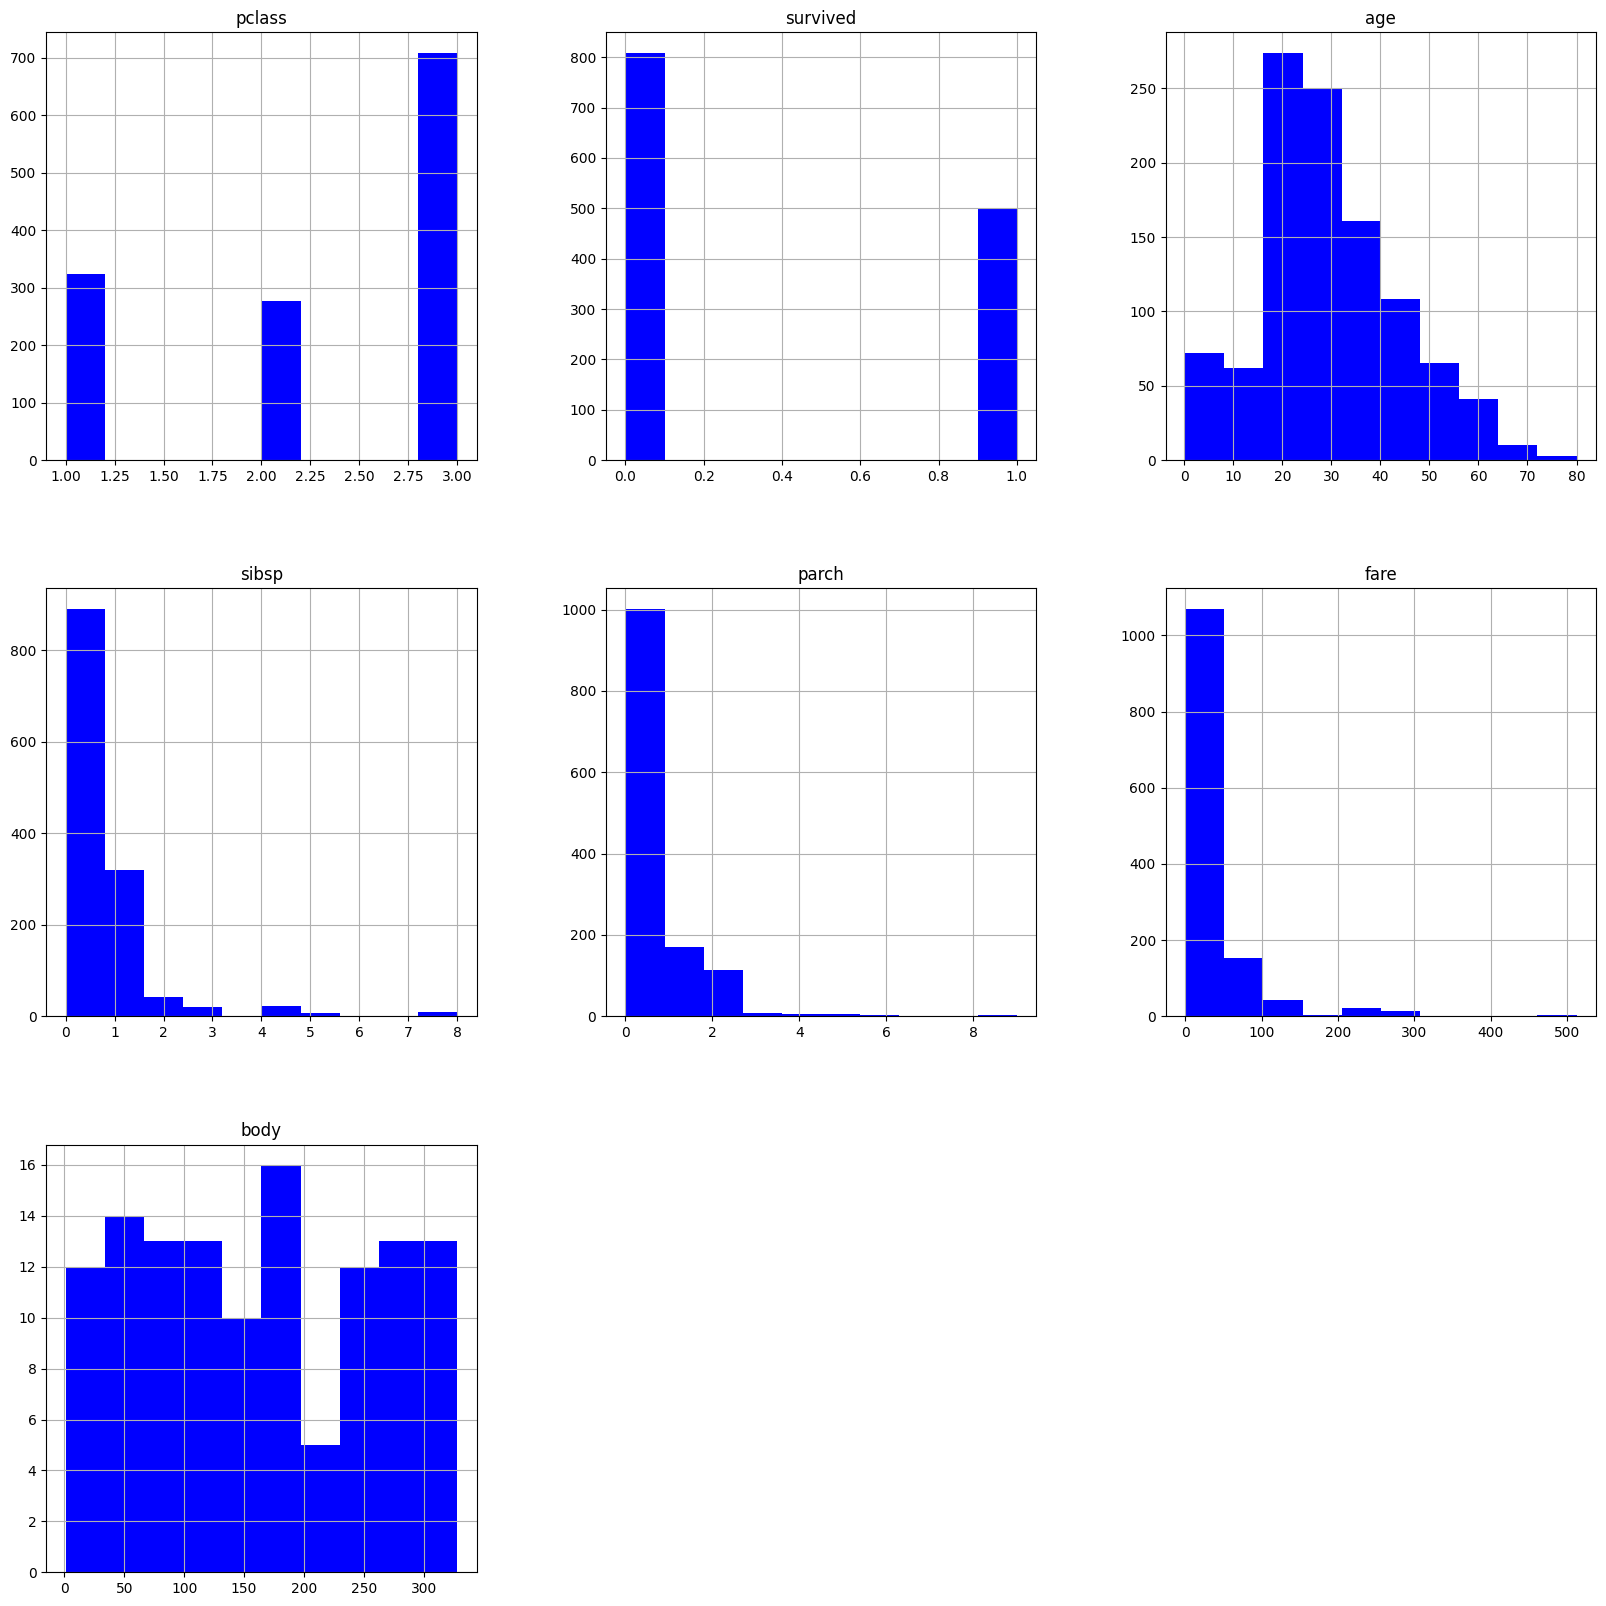

In [ ]:
# 【87】
# t のすべての数値列のヒストグラムを pandas プロットで描画しましょう

print(ans[87]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.execute().hist(figsize=(20,20), color='b')


[answer88]

import matplotlib.pyplot as plt

x = t["age"].to_pandas() # pandas データフレームに変換
y = t["fare"].to_pandas() # pandas データフレームに変換

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x,y)

ax.set_title('age-fare scatter')
ax.set_xlabel("age")
ax.set_ylabel("fare")

fig.show()


----------------------------------------------

[Tips]
・matplotlib についても .execute() でデータフレームに
　変換すれば pandas と同様に描画することができる。

----------------------------------------------

[参考] pandas記法

import matplotlib.pyplot as plt

x = df["age"]
y = df["fare"]

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x,y)

ax.set_title('age-fare scatter')
ax.set_xlabel("age")
ax.set_ylabel("fare")

fig.show()



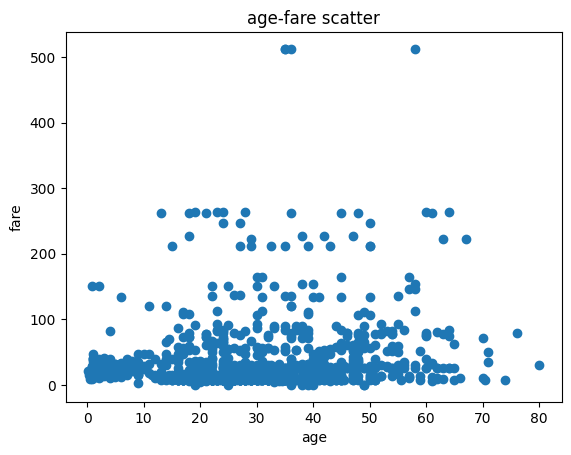

In [ ]:
# 【88】
# t の age , fare 列の散布図を matplotlib で描画しましょう

print(ans[88]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

import matplotlib.pyplot as plt

x = t["age"].to_pandas() # pandas データフレームに変換
y = t["fare"].to_pandas() # pandas データフレームに変換

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(x,y)

ax.set_title('age-fare scatter')
ax.set_xlabel("age")
ax.set_ylabel("fare")

fig.show()

# その他 (89)

In [ ]:
# 【89】
# t の内容を表示する際に途中で途切れないように 30 行までを表示させてみましょう。

print(ans[89]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

ibis.options.repr.interactive.max_rows = 30
t


[answer89]

ibis.options.repr.interactive.max_rows = 30
t


----------------------------------------------

[Tips]
・ibis.options.repr.interactive.max_rows で表示上限数を
　指定することができる。
・なお、列数についてはデフォルトで表示上限がないため、max_columns などは
　存在しない。
・ibis.options については以下のページを参照して下さい。

https://ibis-project.org/reference/options

----------------------------------------------

[参考] pandas記法

該当メソッドなし



┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name                                              ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ ticket   ┃ fare     ┃ cabin   ┃ embarked ┃ boat   ┃ body  ┃ home.dest                          ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ int64  │ int64    │ string                                            │ string │ float64 │ int64 │ int64 │ string   │ float64  │ string  │ string   │ string │ int64 │ string                             │
├────────┼──────────┼───────────────────────────────────────────────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┼─────────┼──────────┼────────┼───────┼────────────────────────────────────┤
│      1 │        1 │ Allen, Miss. Elisabeth Walton                     │ female │   29.00 │     0 │     0 │ 24160    │ 211.3375 │ B5      │ S        │ 2      │  NULL │ St Louis, MO                       │
│      1 │        1 │ Allison, Master. Hudson Trevor                    │ male   │    0.92 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ 11     │  NULL │ Montreal, PQ / Chesterville, ON    │
│      1 │        0 │ Allison, Miss. Helen Loraine                      │ female │    2.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │  NULL │ Montreal, PQ / Chesterville, ON    │
│      1 │        0 │ Allison, Mr. Hudson Joshua Creighton              │ male   │   30.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │   135 │ Montreal, PQ / Chesterville, ON    │
│      1 │        0 │ Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   │ female │   25.00 │     1 │     2 │ 113781   │ 151.5500 │ C22 C26 │ S        │ NULL   │  NULL │ Montreal, PQ / Chesterville, ON    │
│      1 │        1 │ Anderson, Mr. Harry                               │ male   │   48.00 │     0 │     0 │ 19952    │  26.5500 │ E12     │ S        │ 3      │  NULL │ New York, NY                       │
│      1 │        1 │ Andrews, Miss. Kornelia Theodosia                 │ female │   63.00 │     1 │     0 │ 13502    │  77.9583 │ D7      │ S        │ 10     │  NULL │ Hudson, NY                         │
│      1 │        0 │ Andrews, Mr. Thomas Jr                            │ male   │   39.00 │     0 │     0 │ 112050   │   0.0000 │ A36     │ S        │ NULL   │  NULL │ Belfast, NI                        │
│      1 │        1 │ Appleton, Mrs. Edward Dale (Charlotte Lamson)     │ female │   53.00 │     2 │     0 │ 11769    │  51.4792 │ C101    │ S        │ D      │  NULL │ Bayside, Queens, NY                │
│      1 │        0 │ Artagaveytia, Mr. Ramon                           │ male   │   71.00 │     0 │     0 │ PC 17609 │  49.5042 │ NULL    │ C        │ NULL   │    22 │ Montevideo, Uruguay                │
│      1 │        0 │ Astor, Col. John Jacob                            │ male   │   47.00 │     1 │     0 │ PC 17757 │ 227.5250 │ C62 C64 │ C        │ NULL   │   124 │ New York, NY                       │
│      1 │        1 │ Astor, Mrs. John Jacob (Madeleine Talmadge Force) │ female │   18.00 │     1 │     0 │ PC 17757 │ 227.5250 │ C62 C64 │ C        │ 4      │  NULL │ New York, NY                       │
│      1 │        1 │ Aubart, Mme. Leontine Pauline                     │ female │   24.00 │     0 │     0 │ PC 17477 │  69.3000 │ B35     │ C        │ 9      │  NULL │ Paris, France                      │
│      1 │        1 │ Barber, Miss. Ellen "Nellie"                      │ female │   26.00 │     0 │     0 │ 19877    │  78.8500 │ NULL    │ S        │ 6      │  NULL │ NULL                               │
│      1 │        1 │ Barkworth, Mr. Algernon Henry Wilson              │ male   │   8

# タイタニック号の生存者予測 (90 - 100)  
これまで触れてきたタイタニック号の乗客データを使用して、乗客の生存有無を  
予測してみます。  
  
※90～100については順番通りにやらないと上手く動作しません

In [ ]:
# 【90】欠損値確認
# t の欠損値を確認しましょう

print(ans[90]) # 解答表示
t = initialize1() # 初期化
# -----------------------------------------

t.aggregate(
    t[col].isnull().sum().name(col) for col in t.columns
)


[answer90]

t.aggregate(
    t[col].isnull().sum().name(col) for col in t.columns
)


----------------------------------------------

[Tips]
・t["列名"].isnull().sum() で欠損値数を確認する。
・for 文で列数分の欠損値を確認する。
・aggregate でテーブル形式で欠損値数をまとめる。
　テーブル形式にこだわらないのであれば以下の形でも問題ない。

for col in t.columns:
  print(col)
  print(t[col].isnull().sum())

----------------------------------------------

[参考] pandas記法

df.isnull().sum()




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name  ┃ sex   ┃ age   ┃ sibsp ┃ parch ┃ ticket ┃ fare  ┃ cabin ┃ embarked ┃ boat  ┃ body  ┃ home.dest ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━┩
│ int64  │ int64    │ int64 │ int64 │ int64 │ int64 │ int64 │ int64  │ int64 │ int64 │ int64    │ int64 │ int64 │ int64     │
├────────┼──────────┼───────┼───────┼───────┼───────┼───────┼────────┼───────┼───────┼──────────┼───────┼───────┼───────────┤
│      0 │        0 │     0 │     0 │   263 │     0 │     0 │      0 │     1 │  1014 │        2 │   823 │  1188 │       564 │
└────────┴──────────┴───────┴───────┴───────┴───────┴───────┴────────┴───────┴───────┴──────────┴───────┴───────┴───────────┘

In [ ]:
# 【91】欠損値補完
# t の age、fare 列の欠損値を各列の平均値で補完しましょう

print(ans[91]) # 解答表示
# -----------------------------------------

t = t.mutate(
    age=t["age"].fillna(t["age"].mean()),
    fare=t["fare"].fillna(t["fare"].mean())
)

t.aggregate(
    t[col].isnull().sum().name(col) for col in t.columns
)


[answer91]

t = t.mutate(
    age=t["age"].fillna(t["age"].mean()),
    fare=t["fare"].fillna(t["fare"].mean())
)

t.aggregate(
    t[col].isnull().sum().name(col) for col in t.columns
)


----------------------------------------------

[Tips]
・欠損値の補完には .fillna() を使用する。
・欠損値数の確認方法は 問題90 の時と同様である。

----------------------------------------------

[参考] pandas記法

df['age'] = df['age'].fillna(df['age'].mean()) #欠損値にageの平均値で補完
df['fare'] = df['fare'].fillna(df['fare'].mean()) #欠損値にfareの平均値で補完
print(df.isnull().sum())




┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┓
┃ pclass ┃ survived ┃ name  ┃ sex   ┃ age   ┃ sibsp ┃ parch ┃ ticket ┃ fare  ┃ cabin ┃ embarked ┃ boat  ┃ body  ┃ home.dest ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━━┩
│ int64  │ int64    │ int64 │ int64 │ int64 │ int64 │ int64 │ int64  │ int64 │ int64 │ int64    │ int64 │ int64 │ int64     │
├────────┼──────────┼───────┼───────┼───────┼───────┼───────┼────────┼───────┼───────┼──────────┼───────┼───────┼───────────┤
│      0 │        0 │     0 │     0 │     0 │     0 │     0 │      0 │     0 │  1014 │        2 │   823 │  1188 │       564 │
└────────┴──────────┴───────┴───────┴───────┴───────┴───────┴────────┴───────┴───────┴──────────┴───────┴───────┴───────────┘

In [ ]:
# 【92】不要列の削除
# t の中で機械学習で使用しない不要な行を削除
# (name, ticket, cabin, boat, body, home.destを削除)

print(ans[92]) # 解答表示
# -----------------------------------------

t = t.drop('name', 'ticket', 'cabin', 'boat', 'body', 'home.dest')
t.head()


[answer92]

t = t.drop('name', 'ticket', 'cabin', 'boat', 'body', 'home.dest')
t.head()


----------------------------------------------

[Tips]
・列の削除をするには .drop() を使用する。

----------------------------------------------

[参考] pandas記法

df_copy = df.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'],axis=1)
df_copy


┏━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ pclass ┃ survived ┃ sex    ┃ age     ┃ sibsp ┃ parch ┃ fare     ┃ embarked ┃
┡━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ int64  │ int64    │ string │ float64 │ int64 │ int64 │ float64  │ string   │
├────────┼──────────┼────────┼─────────┼───────┼───────┼──────────┼──────────┤
│      1 │        1 │ female │   29.00 │     0 │     0 │ 211.3375 │ S        │
│      1 │        1 │ male   │    0.92 │     1 │     2 │ 151.5500 │ S        │
│      1 │        0 │ female │    2.00 │     1 │     2 │ 151.5500 │ S        │
│      1 │        0 │ male   │   30.00 │     1 │     2 │ 151.5500 │ S        │
│      1 │        0 │ female │   25.00 │     1 │     2 │ 151.5500 │ S        │
└────────┴──────────┴────────┴─────────┴───────┴───────┴──────────┴──────────┘

In [ ]:
# 【93】ラベルエンコーディング
# t の sex と embarked 列をラベルエンコーディングしましょう
# (from sklearn.preprocessing import OrdinalEncoderをインポート)

print(ans[93]) # 解答表示
# -----------------------------------------

from sklearn.preprocessing import OrdinalEncoder

df = t.execute() # テーブルをデータフレームに変換

#ラベルエンコーダのインスタンスを作成
oe = OrdinalEncoder(dtype=int,
                    handle_unknown = 'use_encoded_value',
                    unknown_value = -1
                    )

df['sex'] = oe.fit_transform(df[['sex']]) #エンコーディング
df['embarked'] = oe.fit_transform(df[['embarked']].astype(str))  #ここ、なぜかstrに変換しないとエラー発生
df.head()


[answer93]

from sklearn.preprocessing import OrdinalEncoder

df = t.execute() # テーブルをデータフレームに変換

#ラベルエンコーダのインスタンスを作成
oe = OrdinalEncoder(dtype=int,
                    handle_unknown = 'use_encoded_value',
                    unknown_value = -1
                    )

df['sex'] = oe.fit_transform(df[['sex']]) #エンコーディング
df['embarked'] = oe.fit_transform(df[['embarked']].astype(str))  #ここ、なぜかstrに変換しないとエラー発生
df.head()


----------------------------------------------

[Tips]
・scikit-learn はデータベーステーブルオブジェクトを扱えないので
　.execute() でデータフレームに変換する。
・機械学習では文字列をそのまま、学習アルゴリズムに
　入力できないため、数値に変換する。OrdinalEncoder()では
　例えば、以下のように文字列を数値に変換する。

　male → 0
　female → 1

・OrdinalEncoder() の hadle_unknown , unknown_value 引数では、推論時に
　学習時に存在していなかったラベルがあった場合に、どの値でラベル付けするかを指定している。
・RandomForestなど決定木での分類問題を
　解く場合には、ラベルエンコーディングする
　ことが多い

----------------------------------------------

[参考] pandas記法

from sklearn.preprocessing import OrdinalEncoder

#ラベルエンコーダのインスタンスを作成
oe = OrdinalEncoder(dtype=int,
                    h

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.00,0,0,211.3375,3
1,1,1,1,0.92,1,2,151.5500,3
2,1,0,0,2.00,1,2,151.5500,3
3,1,0,1,30.00,1,2,151.5500,3
4,1,0,0,25.00,1,2,151.5500,3


In [ ]:
# 【94】ndarray形式への変換
# ① df の pclass、age、sex、fare、embarkedの列を抽出し、ndarray形式に変換しましょう
# ② df の survived の列を抽出し、ndarray形式に変換しましょう
# (①を features 、②を target という変数にそれぞれ格納)

print(ans[94]) # 解答表示
# -----------------------------------------

features = df[['pclass','age','sex','fare','embarked']].values
target = df['survived'].values


[answer94]

features = df[['pclass','age','sex','fare','embarked']].values
target = df['survived'].values


----------------------------------------------

[Tips]
・pandas.dataframeやpandas.Seriesをndarray形式(配列)に
　変換するには .values を使用する。
・機械学習ライブラリのscikit-learnではndarray形式で入力する
　必要があるため、そのような際にdataframeをndarray形式に変換する
　必要がある。

----------------------------------------------

[参考] pandas記法

features = df_copy[['pclass','age','sex','fare','embarked']].values
target = df_copy['survived'].values




In [ ]:
# 【95】学習データとテストデータへの分割
# 【94】で作成したfeatrues、targetを学習データとテストデータに分割しましょう
# (from sklearn.model_selection import  train_test_splitをインポート)
# ※分割時のパラメータは次を指定 test_size=0.3 random_state=0

print(ans[95]) # 解答表示
# -----------------------------------------

from sklearn.model_selection import train_test_split

(features , test_X , target , test_y) = train_test_split(features, target , test_size = 0.3 , random_state = 0)


[answer95]

from sklearn.model_selection import train_test_split

(features , test_X , target , test_y) = train_test_split(features, target , test_size = 0.3 , random_state = 0)


----------------------------------------------

[Tips]
・データを学習データ、テストデータに分割する場合は train_test_splitを使用する。
・test_sizeで分割する割合を指定する。
・random_stateでシード値を指定することでデータ分割時の乱数を固定できる。
（検証で乱数を固定したい時に使用）

----------------------------------------------

[参考] pandas記法

Ibis の解答と同じ




In [ ]:
# 【96】学習の実行
# 学習データ(features、target)を用いランダムフォレストにて学習を実行しましょう
# (from sklearn.ensemble import RandomForestClassifierをインポート)
# ※パラメータは次を指定 n_estimators=100 random_state=0

print(ans[96]) # 解答表示
# -----------------------------------------

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=0) # ランダムフォレストのインスタンスを作成

model.fit(features,target) # 学習の実行


[answer96]

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=0) # ランダムフォレストのインスタンスを作成

model.fit(features,target) # 学習の実行


----------------------------------------------

[Tips]
・RandomForestClassifierでランダムフォレストインスタンスを作成する。
・ハイパーパラメータは n_estimators や max_depth などがある。
・.fit() にて学習を実行する。
・入力値は ndarray 形式でないといけない。
（そのため、【94】にてndaaray形式に変換を実施）

----------------------------------------------

[参考] pandas記法

Ibis の解答と同じ


RandomForestClassifier(random_state=0)

In [ ]:
# 【97】予測の実行
# test_Xデータの乗客の生存を予測しましょう

print(ans[97]) # 解答表示
# -----------------------------------------

pred = model.predict(test_X)
pred


[answer97]

pred = model.predict(test_X)


----------------------------------------------

[Tips]
.predict()にて予測を実行

----------------------------------------------

[参考] pandas記法

Ibis の解答と同じ


array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,

In [ ]:
# 【98】予測精度の確認
# 予測結果がtest_y(生存有無の答え)とどれぐらい
# 整合していたかを確認しましょう(評価指標はaccuracy)
# (from sklearn.metrics import accuracy_scoreをインポート)

print(ans[98]) # 解答表示
# -----------------------------------------

from sklearn.metrics import accuracy_score

accuracy_score(pred,test_y)


[answer98]

from sklearn.metrics import accuracy_score

accuracy_score(pred,test_y)


----------------------------------------------

[Tips]
・accuracy_score(正解率)にて予測精度を確認する。
　（ accuracy は 1.0 に近いほど良い）
・予測精度の評価指標には様々あるため、タスクに
　合わせて適切な指標を選択する。

（参考）分類タスクの評価指標
　https://qiita.com/jyori112/items/110596b4f04e4e1a3c9b

----------------------------------------------

[参考] pandas記法

Ibis の解答と同じ


0.7913486005089059

In [ ]:
# 【99】重要度の確認
# 学習における各列(特徴量)の
# 重要度を表示しましょう

print(ans[99]) # 解答表示
# -----------------------------------------

importance = model.feature_importances_

print('Feature Importances:')
for i, feat in enumerate(['pclass','age','sex','fare','embarked']):
    print('\t{0:20s} : {1:>.5f}'.format(feat, importance[i]))


[answer99]

importance = model.feature_importances_ 

print('Feature Importances:')
for i, feat in enumerate(['pclass','age','sex','fare','embarked']):
    print('\t{0:20s} : {1:>.5f}'.format(feat, importance[i]))


----------------------------------------------

[Tips]
・.feature_importances_にてランダムフォレストの
　学習における各列(特徴量)の重要度を確認できる。

----------------------------------------------

[参考] pandas記法

Ibis の解答と同じ
Feature Importances:
	pclass               : 0.08777
	age                  : 0.28760
	sex                  : 0.27862
	fare                 : 0.31466
	embarked             : 0.03135


In [ ]:
# 【100】予測結果のcsv出力
# test_Xの予測結果をcsvでoutputフォルダに出力しましょう(ファイル名は「submission.csv」)
# (headerは不要)

print(ans[100]) # 解答表示
# -----------------------------------------

df_pred = pd.DataFrame(pred)
df_pred.to_csv('./output/submission.csv', index=False)


[answer100]

df_pred = pd.DataFrame(pred)
df_pred.to_csv('./output/submission.csv', index=False)


----------------------------------------------

[Tips]
・to_csv() で csv 形式で出力する。
・出力時に index を付けたくないときは index=False を指定する。

----------------------------------------------

[参考] pandas記法

Ibis の解答と同じ


# ノックお疲れ様でした